# Homework 2 - EECS 600 Deep Learning

Name: Gary Yao

Instructions: All assignments are to be completed individually. Please complete each question as best you can. Once you have completed all of the problems, reset your runtime or kernel and run the notebook in order. Download the .ipynb file and submit it via Canvas.

Library usage: Several of the algorithms implemented in this, and other assignments, have implementations available in tensorflow. For this assignment, you are limited to basic operations within tensorflow and cannot use their high level APIs like tf.optimizer, tf.keras, etc.

All code presented in class is free to use in your assignments.

Your grade is based on the correctness of your implementation, not the quality of your code but you are encouraged to include comments in your code to help the graders understand your decisions.

For clarity, the final operation you should take is restarting the runtime and running all.

Due Date: 10/15/19 - midnight EST

100 Points Total

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.enable_eager_execution()

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (x_train.shape[0], 28*28))
x_test = np.reshape(x_test, (x_test.shape[0], 28*28))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255. 

11493376/11490434 [==============================] - 0s 0us/step


## Recommendation
When building and testing your code, work on a smaller subset of the data. [This example](https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array) may help in that.

Additionally, if you are having trouble getting autoencoders to fit with sigmoid hidden units, feel free to change them to ReLU units instead.

# Question 1
Implement an autoencoder that encodes MNIST images as a 64 dimensional representation. Your hidden layer should use sigmoid activation functions. Determine an appropriate learning rate and number of epochs to train your model. Use a minibatch size of 128.

In [0]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))

class Model(object):
  def __init__(self, num_inputs, num_hidden=64):
    self.b1 = tf.Variable(tf.random.uniform(
                  (1, num_hidden),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.uniform(
                  (num_inputs, num_hidden),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
    self.b2 = tf.Variable(tf.random.uniform(
                  (1, num_inputs),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
    self.W2 = tf.Variable(tf.random.uniform(
                  (num_hidden, num_inputs),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))
  def __call__(self, x):
    return self.forward(x)
  
  def encode(self, x):
    a1 = tf.nn.sigmoid(
          tf.linalg.matmul(x, self.W1) + self.b1
          )
    return a1
  
  def decode(self, h):
    a2 = tf.nn.sigmoid(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    return a2

  def forward(self, x):
    a1 = self.encode(x)
    a2 = self.decode(a1)
    return a2
  
  def step(self, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
      current_loss = loss(self(inputs), outputs)
    dW1, dW2, db1, db2 = t.gradient(current_loss, [self.W1, self.W2, self.b1, self.b2])
    
    # model.W1 = model.W1 - learning_rate * dW1
    self.W1.assign_sub(learning_rate * dW1)
    self.W2.assign_sub(learning_rate * dW2)
    self.b1.assign_sub(learning_rate * db1)
    self.b2.assign_sub(learning_rate * db2)


In [0]:
model = Model(x_train.shape[1], num_hidden=64)
learning_rate = .5
batch_size = 128
fig = plt.figure()
train_loss_hist = []
test_loss_hist = []
for epoch in range(250):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_train[start_idx:end_idx, :]
    model.step(x_train_, x_train_, learning_rate)

  train_loss = loss(x_train, model(x_train))
  test_loss = loss(x_test, model(x_test))
  train_loss_hist.append(train_loss)
  test_loss_hist.append(test_loss)
  print(f'The train loss value for epoch {epoch} is {train_loss:0.4f}')
  print(f'The test loss value for epoch {epoch} is {test_loss:0.4f}')
  #x_test_hat = model(x_test)
  #test_img = np.reshape(x_test_hat[2,:], (28, 28))
  #plt.imshow(test_img, cmap=plt.cm.gray)
  #plt.title(f'The test loss value for epoch {epoch} is {test_loss:0.5f}')
  #plt.show()


The train loss value for epoch 0 is 0.0903
The test loss value for epoch 0 is 0.0903
The train loss value for epoch 1 is 0.0746
The test loss value for epoch 1 is 0.0748
The train loss value for epoch 2 is 0.0714
The test loss value for epoch 2 is 0.0716
The train loss value for epoch 3 is 0.0701
The test loss value for epoch 3 is 0.0703
The train loss value for epoch 4 is 0.0694
The test loss value for epoch 4 is 0.0696
The train loss value for epoch 5 is 0.0690
The test loss value for epoch 5 is 0.0692
The train loss value for epoch 6 is 0.0687
The test loss value for epoch 6 is 0.0689
The train loss value for epoch 7 is 0.0685
The test loss value for epoch 7 is 0.0687
The train loss value for epoch 8 is 0.0684
The test loss value for epoch 8 is 0.0686
The train loss value for epoch 9 is 0.0682
The test loss value for epoch 9 is 0.0684
The train loss value for epoch 10 is 0.0681
The test loss value for epoch 10 is 0.0683
The train loss value for epoch 11 is 0.0681
The test loss value

<Figure size 432x288 with 0 Axes>

<function matplotlib.pyplot.show>

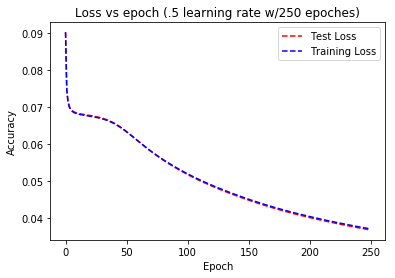

In [0]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(250)
plt.plot(x_axis, test_loss_hist, 'r--')
plt.plot(x_axis, train_loss_hist, 'b--')
plt.title('Loss vs epoch (.5 learning rate w/250 epoches)')
plt.legend(['Test Loss', 'Training Loss'])
plt.show

In [0]:
model = Model(x_train.shape[1], num_hidden=64)
learning_rate = .83
batch_size = 128
fig = plt.figure()
epoch_num = 200
train_loss_hist = []
test_loss_hist = []
for epoch in range(epoch_num):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_train[start_idx:end_idx, :]
    model.step(x_train_, x_train_, learning_rate)

  train_loss = loss(x_train, model(x_train))
  test_loss = loss(x_test, model(x_test))
  train_loss_hist.append(train_loss)
  test_loss_hist.append(test_loss)
  print(f'The train loss value for epoch {epoch} is {train_loss:0.4f}')
  print(f'The test loss value for epoch {epoch} is {test_loss:0.4f}')
  #x_test_hat = model(x_test)
  #test_img = np.reshape(x_test_hat[2,:], (28, 28))
  #plt.imshow(test_img, cmap=plt.cm.gray)
  #plt.title(f'The test loss value for epoch {epoch} is {test_loss:0.5f}')
  #plt.show()


The train loss value for epoch 0 is 0.0770
The test loss value for epoch 0 is 0.0771
The train loss value for epoch 1 is 0.0709
The test loss value for epoch 1 is 0.0711
The train loss value for epoch 2 is 0.0694
The test loss value for epoch 2 is 0.0696
The train loss value for epoch 3 is 0.0688
The test loss value for epoch 3 is 0.0690
The train loss value for epoch 4 is 0.0685
The test loss value for epoch 4 is 0.0687
The train loss value for epoch 5 is 0.0683
The test loss value for epoch 5 is 0.0685
The train loss value for epoch 6 is 0.0681
The test loss value for epoch 6 is 0.0683
The train loss value for epoch 7 is 0.0680
The test loss value for epoch 7 is 0.0682
The train loss value for epoch 8 is 0.0679
The test loss value for epoch 8 is 0.0681
The train loss value for epoch 9 is 0.0678
The test loss value for epoch 9 is 0.0680
The train loss value for epoch 10 is 0.0677
The test loss value for epoch 10 is 0.0679
The train loss value for epoch 11 is 0.0676
The test loss value

<Figure size 432x288 with 0 Axes>

Plot the training and testing reconstruction error for each epoch for your chosed number of epochs and learning rate using matplotlib.

<function matplotlib.pyplot.show>

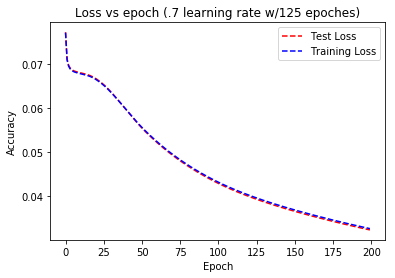

In [0]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(epoch_num)
plt.plot(x_axis, test_loss_hist, 'r--')
plt.plot(x_axis, train_loss_hist, 'b--')
plt.title('Loss vs epoch (.7 learning rate w/125 epoches)')
plt.legend(['Test Loss', 'Training Loss'])
plt.show

Plot a 10x10 image of reconstructred random examples from your testing set.

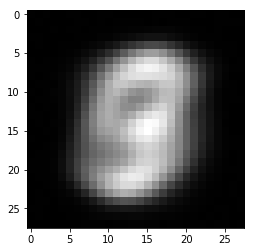

In [0]:
x_test_hat = model(x_test)
row_rand = np.random.randint(0,400)
test_img = np.reshape(x_test_hat[row_rand,:], (28, 28))
plt.imshow(test_img, cmap=plt.cm.gray)
plt.show()

How did you determine the appropriate learning rate and number of epochs for training?

Given limited computational resources, it reasonable to train up to 200 epoches to show differences between learning rates. I tried learning rates of .1,.3,.5,.7,.83. None of these learning rates caused differenciation between train and test loss, therefore I choose .83 as it gave the lowest error after 200 epoches.

## Question 1 Part 2
Add an $L_1$ regularization weight term to your loss function only on the weights to your encoder. Your new loss function should be $L(X) = \sum_i(X_i - decode(encode(X_i)))^2 + \alpha\sum_j|W_j|$ where $X$ is a minibatch of your data. Determine an appropriate value of $\alpha$. If you are having trouble getting started, consider values in powers of 10, i.e. $\alpha = 10^-5, 10^-4, 10^-3, ..., 10^1, 10^2, 10^3$.

In [0]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))


class Model(object):
  def __init__(self, num_inputs, num_hidden=64):
    self.b1 = tf.Variable(tf.random.uniform(
                  (1, num_hidden),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.uniform(
                  (num_inputs, num_hidden),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
    self.b2 = tf.Variable(tf.random.uniform(
                  (1, num_inputs),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
    self.W2 = tf.Variable(tf.random.uniform(
                  (num_hidden, num_inputs),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))
  def __call__(self, x):
    return self.forward(x)
  
  def encode(self, x):
    a1 = tf.nn.sigmoid(
          tf.linalg.matmul(x, self.W1) + self.b1
          )
    return a1
  
  def decode(self, h):
    a2 = tf.nn.sigmoid(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    return a2
  
  def weight_sum(self):
    sum = 0
    sum += tf.math.reduce_sum(tf.abs(self.W1))
    sum += tf.math.reduce_sum(tf.abs(self.W2))
    sum += tf.math.reduce_sum(tf.abs(self.b1))
    sum += tf.math.reduce_sum(tf.abs(self.b2))
    return sum
  
  def forward(self, x):
    a1 = self.encode(x)
    a2 = self.decode(a1)
    return a2
  
  def step(self, inputs, outputs, learning_rate, beta):
    with tf.GradientTape() as t:
      current_loss = loss(self(inputs), outputs) + beta * self.weight_sum()
    dW1, dW2, db1, db2 = t.gradient(current_loss, [self.W1, self.W2, self.b1, self.b2])
    
    # model.W1 = model.W1 - learning_rate * dW1
    self.W1.assign_sub(learning_rate * dW1)
    self.W2.assign_sub(learning_rate * dW2)
    self.b1.assign_sub(learning_rate * db1)
    self.b2.assign_sub(learning_rate * db2)
  
  def enum_layers(self):
    return [self.W1, self.W2, self.b1, self.b2]


Plot the training and testing reconstruction error for each epoch for your chosed number of epochs and learning rate using matplotlib. Additionally, plot the weight regularization value at each epoch ($\sum_j|W_j|$).

The train loss value for epoch 0 is 0.1844
The test loss value for epoch 0 is 0.1844
The sum of weights for epoch 0 is 4329.82568359375


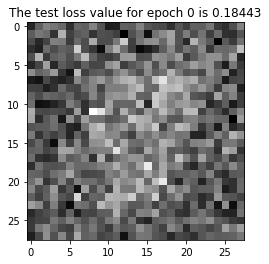

The train loss value for epoch 1 is 0.1362
The test loss value for epoch 1 is 0.1360
The sum of weights for epoch 1 is 4343.76708984375


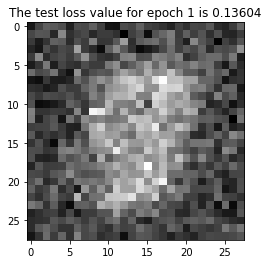

The train loss value for epoch 2 is 0.1058
The test loss value for epoch 2 is 0.1057
The sum of weights for epoch 2 is 4371.541015625


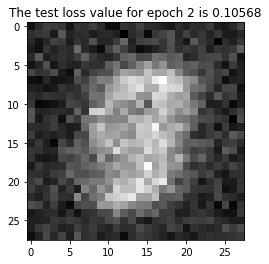

The train loss value for epoch 3 is 0.0910
The test loss value for epoch 3 is 0.0910
The sum of weights for epoch 3 is 4395.365234375


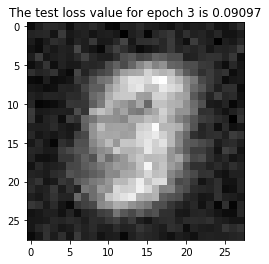

The train loss value for epoch 4 is 0.0836
The test loss value for epoch 4 is 0.0836
The sum of weights for epoch 4 is 4410.98193359375


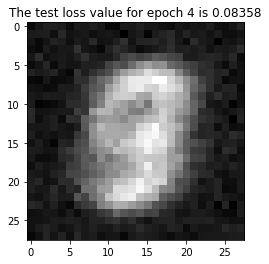

The train loss value for epoch 5 is 0.0794
The test loss value for epoch 5 is 0.0795
The sum of weights for epoch 5 is 4419.66259765625


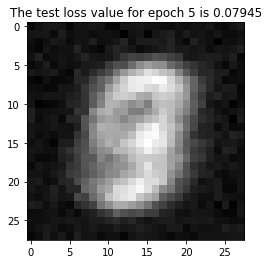

The train loss value for epoch 6 is 0.0768
The test loss value for epoch 6 is 0.0769
The sum of weights for epoch 6 is 4422.96337890625


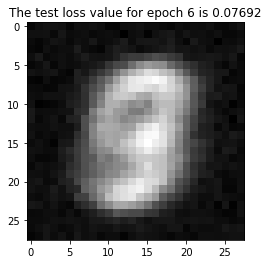

The train loss value for epoch 7 is 0.0751
The test loss value for epoch 7 is 0.0752
The sum of weights for epoch 7 is 4422.21923828125


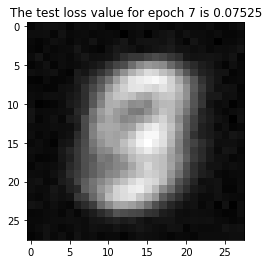

The train loss value for epoch 8 is 0.0739
The test loss value for epoch 8 is 0.0741
The sum of weights for epoch 8 is 4418.3017578125


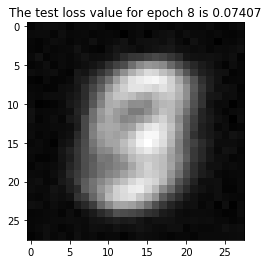

The train loss value for epoch 9 is 0.0730
The test loss value for epoch 9 is 0.0732
The sum of weights for epoch 9 is 4411.88232421875


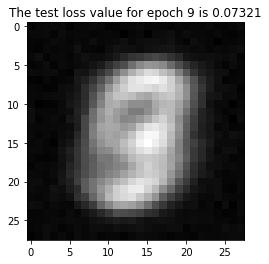

The train loss value for epoch 10 is 0.0724
The test loss value for epoch 10 is 0.0725
The sum of weights for epoch 10 is 4403.44921875


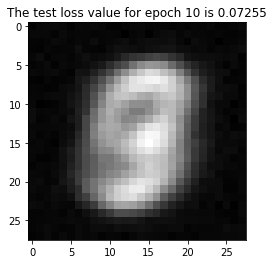

The train loss value for epoch 11 is 0.0719
The test loss value for epoch 11 is 0.0720
The sum of weights for epoch 11 is 4393.52587890625


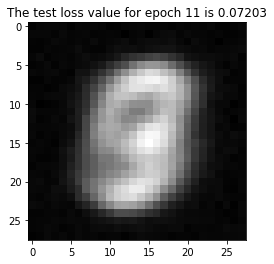

The train loss value for epoch 12 is 0.0714
The test loss value for epoch 12 is 0.0716
The sum of weights for epoch 12 is 4382.31884765625


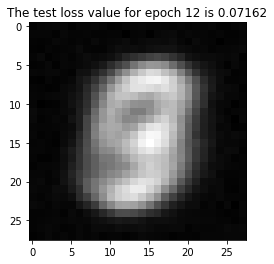

The train loss value for epoch 13 is 0.0711
The test loss value for epoch 13 is 0.0713
The sum of weights for epoch 13 is 4370.0107421875


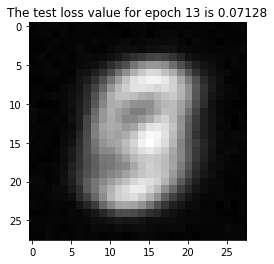

The train loss value for epoch 14 is 0.0708
The test loss value for epoch 14 is 0.0710
The sum of weights for epoch 14 is 4356.8330078125


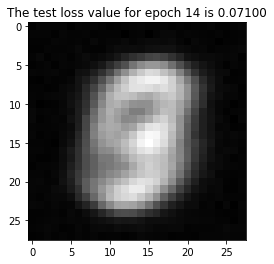

The train loss value for epoch 15 is 0.0706
The test loss value for epoch 15 is 0.0708
The sum of weights for epoch 15 is 4342.927734375


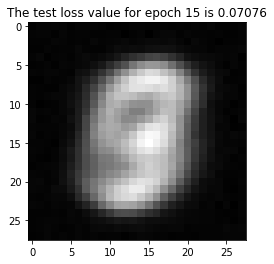

The train loss value for epoch 16 is 0.0704
The test loss value for epoch 16 is 0.0706
The sum of weights for epoch 16 is 4328.38916015625


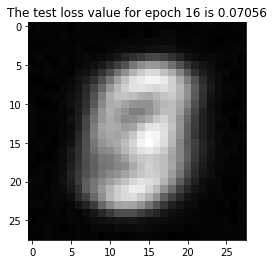

The train loss value for epoch 17 is 0.0702
The test loss value for epoch 17 is 0.0704
The sum of weights for epoch 17 is 4313.33203125


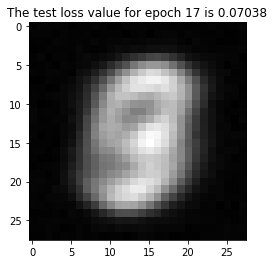

The train loss value for epoch 18 is 0.0700
The test loss value for epoch 18 is 0.0702
The sum of weights for epoch 18 is 4297.84423828125


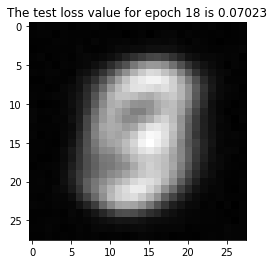

The train loss value for epoch 19 is 0.0699
The test loss value for epoch 19 is 0.0701
The sum of weights for epoch 19 is 4281.97998046875


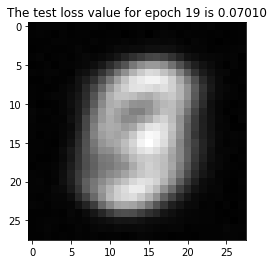

The train loss value for epoch 20 is 0.0698
The test loss value for epoch 20 is 0.0700
The sum of weights for epoch 20 is 4265.794921875


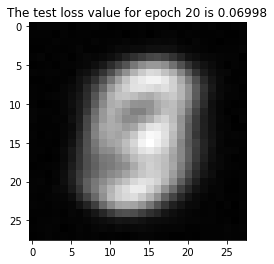

The train loss value for epoch 21 is 0.0697
The test loss value for epoch 21 is 0.0699
The sum of weights for epoch 21 is 4249.34521484375


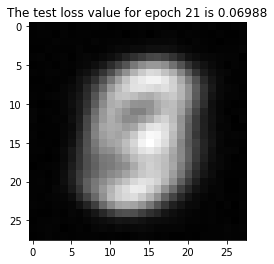

The train loss value for epoch 22 is 0.0696
The test loss value for epoch 22 is 0.0698
The sum of weights for epoch 22 is 4232.6494140625


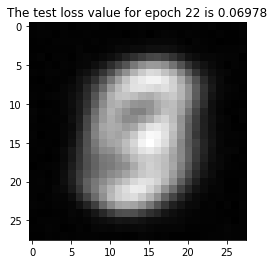

The train loss value for epoch 23 is 0.0695
The test loss value for epoch 23 is 0.0697
The sum of weights for epoch 23 is 4215.7392578125


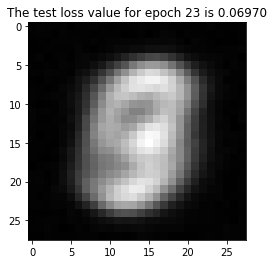

The train loss value for epoch 24 is 0.0694
The test loss value for epoch 24 is 0.0696
The sum of weights for epoch 24 is 4198.6796875


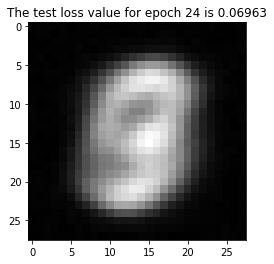

The train loss value for epoch 25 is 0.0694
The test loss value for epoch 25 is 0.0696
The sum of weights for epoch 25 is 4181.4716796875


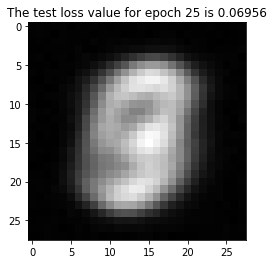

The train loss value for epoch 26 is 0.0693
The test loss value for epoch 26 is 0.0695
The sum of weights for epoch 26 is 4164.14208984375


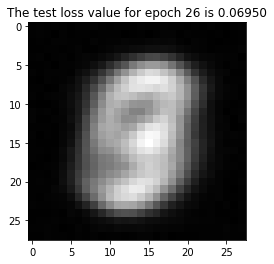

The train loss value for epoch 27 is 0.0692
The test loss value for epoch 27 is 0.0694
The sum of weights for epoch 27 is 4146.71875


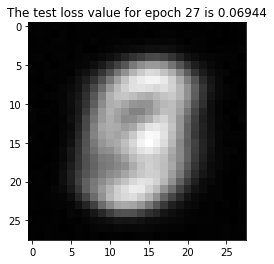

The train loss value for epoch 28 is 0.0692
The test loss value for epoch 28 is 0.0694
The sum of weights for epoch 28 is 4129.21533203125


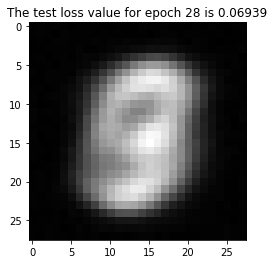

The train loss value for epoch 29 is 0.0691
The test loss value for epoch 29 is 0.0693
The sum of weights for epoch 29 is 4111.64990234375


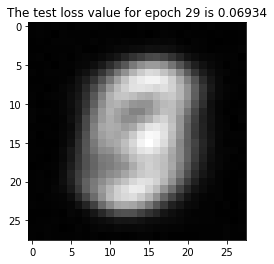

The train loss value for epoch 30 is 0.0691
The test loss value for epoch 30 is 0.0693
The sum of weights for epoch 30 is 4094.045654296875


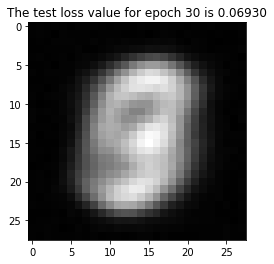

The train loss value for epoch 31 is 0.0691
The test loss value for epoch 31 is 0.0693
The sum of weights for epoch 31 is 4076.417724609375


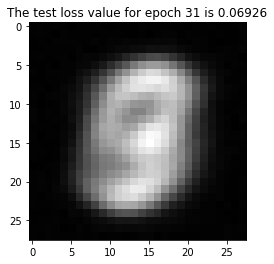

The train loss value for epoch 32 is 0.0690
The test loss value for epoch 32 is 0.0692
The sum of weights for epoch 32 is 4058.765625


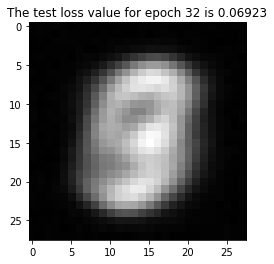

The train loss value for epoch 33 is 0.0690
The test loss value for epoch 33 is 0.0692
The sum of weights for epoch 33 is 4041.098388671875


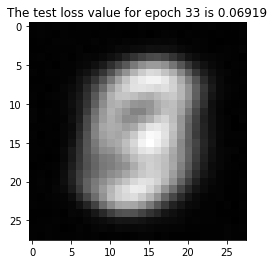

The train loss value for epoch 34 is 0.0690
The test loss value for epoch 34 is 0.0692
The sum of weights for epoch 34 is 4023.433837890625


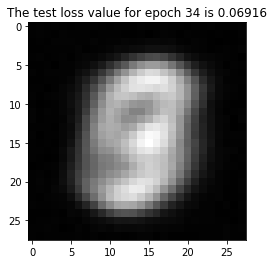

The train loss value for epoch 35 is 0.0689
The test loss value for epoch 35 is 0.0691
The sum of weights for epoch 35 is 4005.7724609375


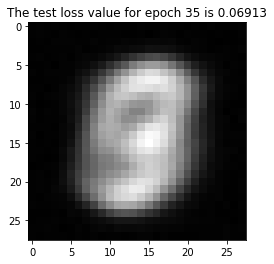

The train loss value for epoch 36 is 0.0689
The test loss value for epoch 36 is 0.0691
The sum of weights for epoch 36 is 3988.13134765625


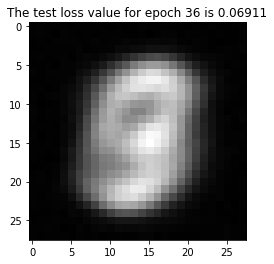

The train loss value for epoch 37 is 0.0689
The test loss value for epoch 37 is 0.0691
The sum of weights for epoch 37 is 3970.51904296875


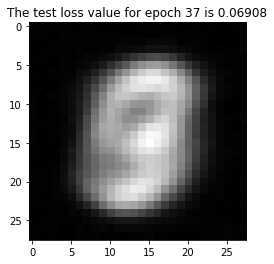

The train loss value for epoch 38 is 0.0689
The test loss value for epoch 38 is 0.0691
The sum of weights for epoch 38 is 3952.948486328125


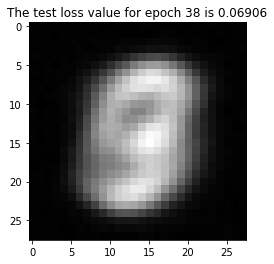

The train loss value for epoch 39 is 0.0688
The test loss value for epoch 39 is 0.0690
The sum of weights for epoch 39 is 3935.4150390625


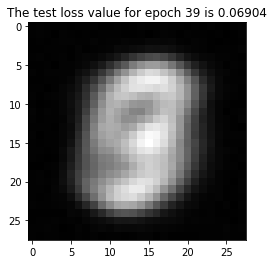

The train loss value for epoch 40 is 0.0688
The test loss value for epoch 40 is 0.0690
The sum of weights for epoch 40 is 3917.92822265625


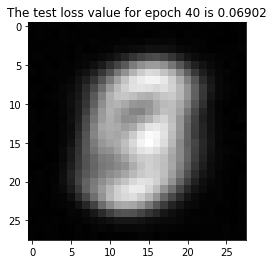

The train loss value for epoch 41 is 0.0688
The test loss value for epoch 41 is 0.0690
The sum of weights for epoch 41 is 3900.4970703125


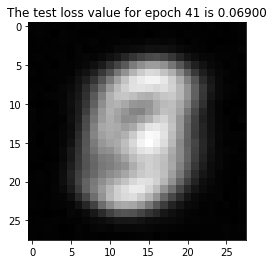

The train loss value for epoch 42 is 0.0688
The test loss value for epoch 42 is 0.0690
The sum of weights for epoch 42 is 3883.125244140625


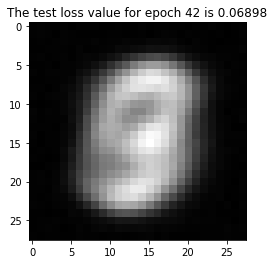

The train loss value for epoch 43 is 0.0688
The test loss value for epoch 43 is 0.0690
The sum of weights for epoch 43 is 3865.819580078125


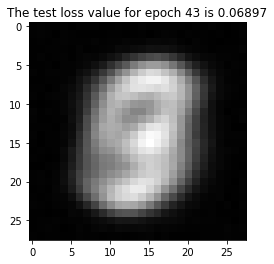

The train loss value for epoch 44 is 0.0687
The test loss value for epoch 44 is 0.0690
The sum of weights for epoch 44 is 3848.579833984375


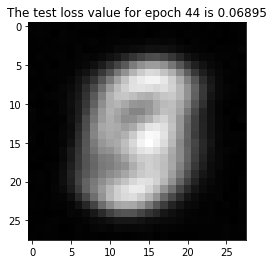

The train loss value for epoch 45 is 0.0687
The test loss value for epoch 45 is 0.0689
The sum of weights for epoch 45 is 3831.42041015625


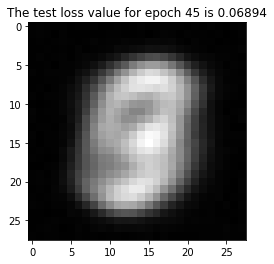

The train loss value for epoch 46 is 0.0687
The test loss value for epoch 46 is 0.0689
The sum of weights for epoch 46 is 3814.34765625


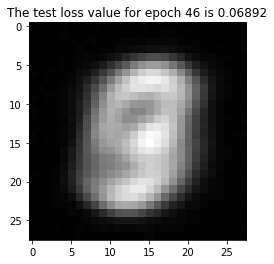

The train loss value for epoch 47 is 0.0687
The test loss value for epoch 47 is 0.0689
The sum of weights for epoch 47 is 3797.369873046875


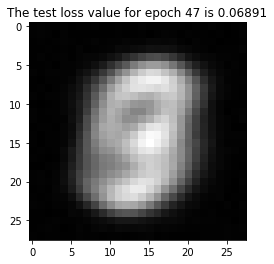

The train loss value for epoch 48 is 0.0687
The test loss value for epoch 48 is 0.0689
The sum of weights for epoch 48 is 3780.489990234375


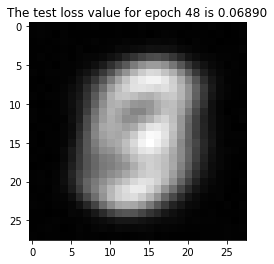

The train loss value for epoch 49 is 0.0687
The test loss value for epoch 49 is 0.0689
The sum of weights for epoch 49 is 3763.716796875


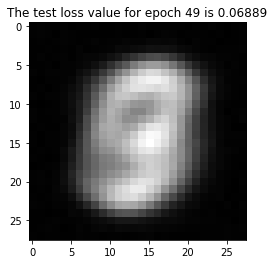

The train loss value for epoch 50 is 0.0687
The test loss value for epoch 50 is 0.0689
The sum of weights for epoch 50 is 3747.03662109375


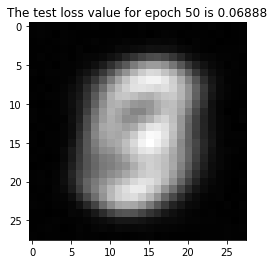

The train loss value for epoch 51 is 0.0687
The test loss value for epoch 51 is 0.0689
The sum of weights for epoch 51 is 3730.449951171875


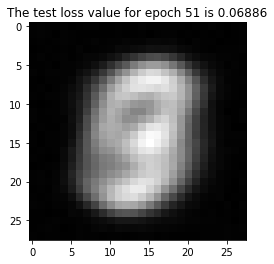

The train loss value for epoch 52 is 0.0687
The test loss value for epoch 52 is 0.0689
The sum of weights for epoch 52 is 3713.968505859375


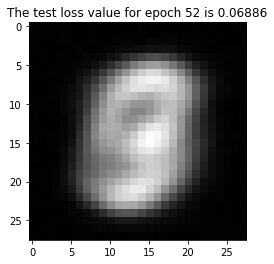

The train loss value for epoch 53 is 0.0686
The test loss value for epoch 53 is 0.0688
The sum of weights for epoch 53 is 3697.59423828125


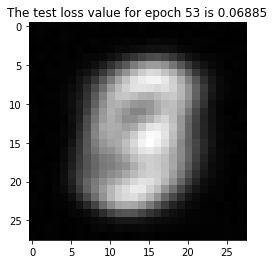

The train loss value for epoch 54 is 0.0686
The test loss value for epoch 54 is 0.0688
The sum of weights for epoch 54 is 3681.333251953125


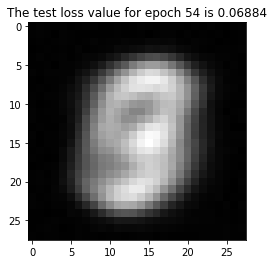

The train loss value for epoch 55 is 0.0686
The test loss value for epoch 55 is 0.0688
The sum of weights for epoch 55 is 3665.17236328125


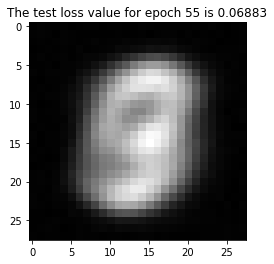

The train loss value for epoch 56 is 0.0686
The test loss value for epoch 56 is 0.0688
The sum of weights for epoch 56 is 3649.120361328125


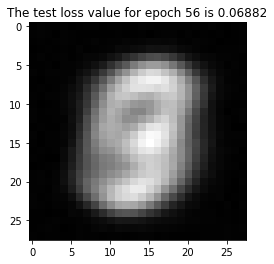

The train loss value for epoch 57 is 0.0686
The test loss value for epoch 57 is 0.0688
The sum of weights for epoch 57 is 3633.194580078125


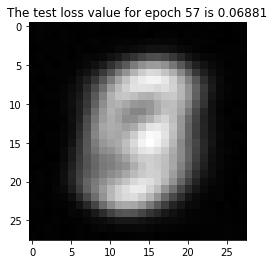

The train loss value for epoch 58 is 0.0686
The test loss value for epoch 58 is 0.0688
The sum of weights for epoch 58 is 3617.396728515625


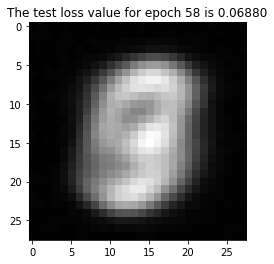

The train loss value for epoch 59 is 0.0686
The test loss value for epoch 59 is 0.0688
The sum of weights for epoch 59 is 3601.720703125


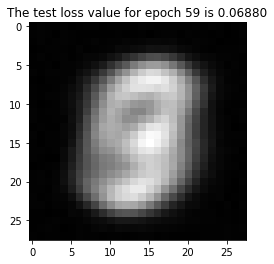

The train loss value for epoch 60 is 0.0686
The test loss value for epoch 60 is 0.0688
The sum of weights for epoch 60 is 3586.164306640625


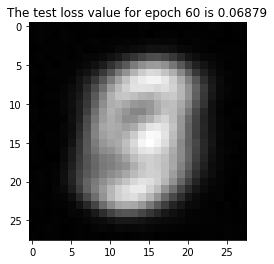

The train loss value for epoch 61 is 0.0686
The test loss value for epoch 61 is 0.0688
The sum of weights for epoch 61 is 3570.72314453125


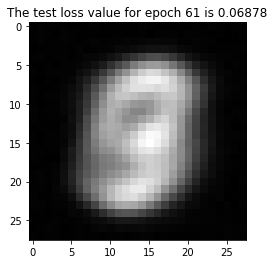

The train loss value for epoch 62 is 0.0686
The test loss value for epoch 62 is 0.0688
The sum of weights for epoch 62 is 3555.4052734375


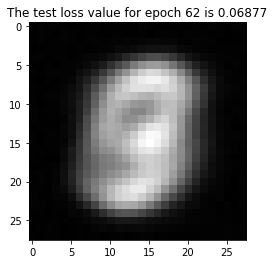

The train loss value for epoch 63 is 0.0686
The test loss value for epoch 63 is 0.0688
The sum of weights for epoch 63 is 3540.2060546875


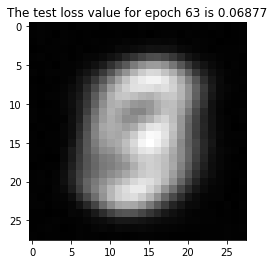

The train loss value for epoch 64 is 0.0686
The test loss value for epoch 64 is 0.0688
The sum of weights for epoch 64 is 3525.127197265625


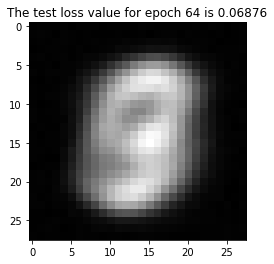

The train loss value for epoch 65 is 0.0686
The test loss value for epoch 65 is 0.0688
The sum of weights for epoch 65 is 3510.168701171875


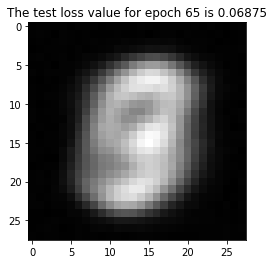

The train loss value for epoch 66 is 0.0685
The test loss value for epoch 66 is 0.0687
The sum of weights for epoch 66 is 3495.331298828125


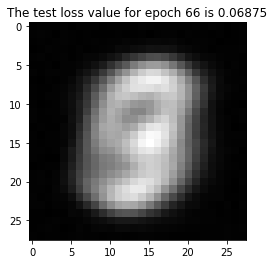

The train loss value for epoch 67 is 0.0685
The test loss value for epoch 67 is 0.0687
The sum of weights for epoch 67 is 3480.629638671875


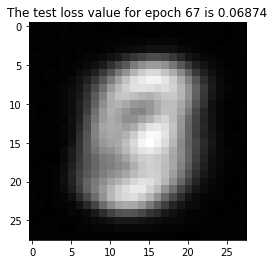

The train loss value for epoch 68 is 0.0685
The test loss value for epoch 68 is 0.0687
The sum of weights for epoch 68 is 3466.0537109375


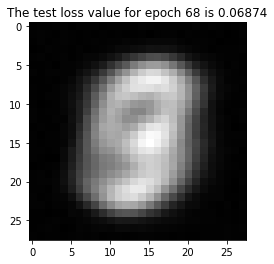

The train loss value for epoch 69 is 0.0685
The test loss value for epoch 69 is 0.0687
The sum of weights for epoch 69 is 3451.595458984375


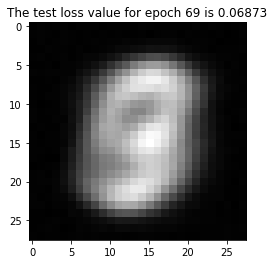

The train loss value for epoch 70 is 0.0685
The test loss value for epoch 70 is 0.0687
The sum of weights for epoch 70 is 3437.26025390625


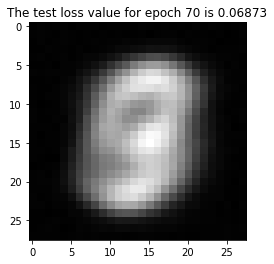

The train loss value for epoch 71 is 0.0685
The test loss value for epoch 71 is 0.0687
The sum of weights for epoch 71 is 3423.054443359375


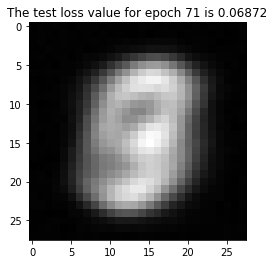

The train loss value for epoch 72 is 0.0685
The test loss value for epoch 72 is 0.0687
The sum of weights for epoch 72 is 3408.9677734375


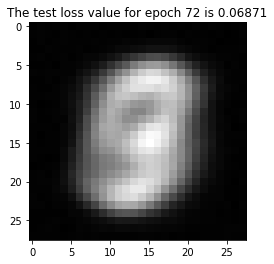

The train loss value for epoch 73 is 0.0685
The test loss value for epoch 73 is 0.0687
The sum of weights for epoch 73 is 3395.009521484375


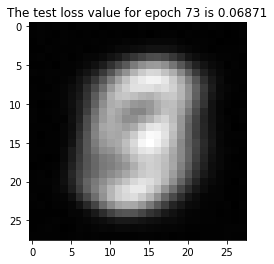

The train loss value for epoch 74 is 0.0685
The test loss value for epoch 74 is 0.0687
The sum of weights for epoch 74 is 3381.17529296875


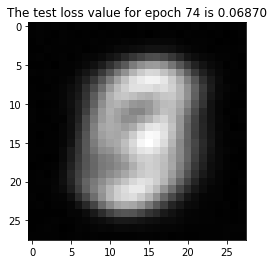

The train loss value for epoch 75 is 0.0685
The test loss value for epoch 75 is 0.0687
The sum of weights for epoch 75 is 3367.45556640625


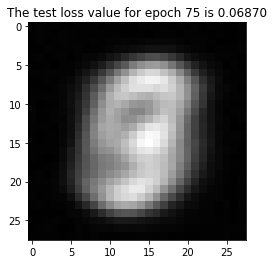

The train loss value for epoch 76 is 0.0685
The test loss value for epoch 76 is 0.0687
The sum of weights for epoch 76 is 3353.853271484375


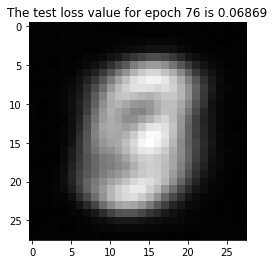

The train loss value for epoch 77 is 0.0685
The test loss value for epoch 77 is 0.0687
The sum of weights for epoch 77 is 3340.371337890625


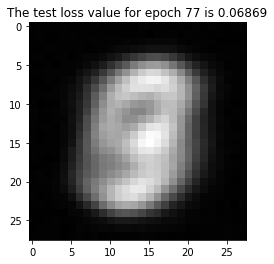

The train loss value for epoch 78 is 0.0685
The test loss value for epoch 78 is 0.0687
The sum of weights for epoch 78 is 3327.010009765625


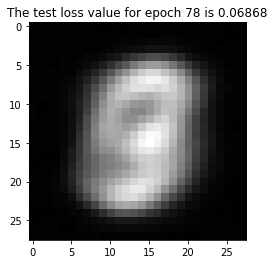

The train loss value for epoch 79 is 0.0685
The test loss value for epoch 79 is 0.0687
The sum of weights for epoch 79 is 3313.769287109375


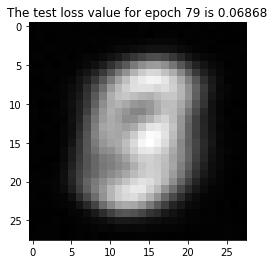

The train loss value for epoch 80 is 0.0685
The test loss value for epoch 80 is 0.0687
The sum of weights for epoch 80 is 3300.643310546875


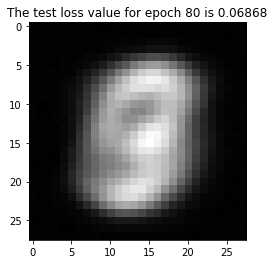

The train loss value for epoch 81 is 0.0685
The test loss value for epoch 81 is 0.0687
The sum of weights for epoch 81 is 3287.63134765625


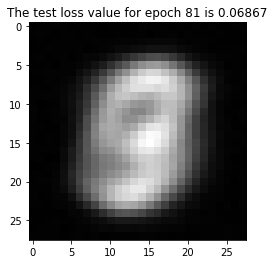

The train loss value for epoch 82 is 0.0685
The test loss value for epoch 82 is 0.0687
The sum of weights for epoch 82 is 3274.72998046875


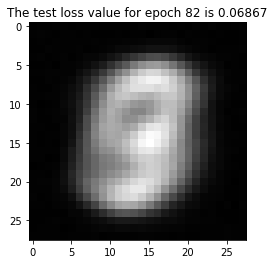

The train loss value for epoch 83 is 0.0685
The test loss value for epoch 83 is 0.0687
The sum of weights for epoch 83 is 3261.942138671875


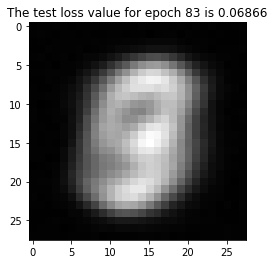

The train loss value for epoch 84 is 0.0685
The test loss value for epoch 84 is 0.0687
The sum of weights for epoch 84 is 3249.256591796875


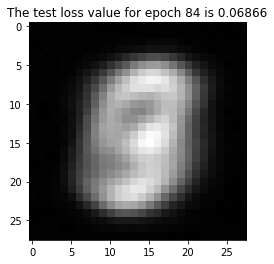

The train loss value for epoch 85 is 0.0685
The test loss value for epoch 85 is 0.0687
The sum of weights for epoch 85 is 3236.671142578125


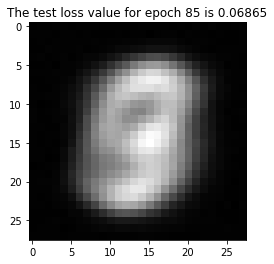

The train loss value for epoch 86 is 0.0684
The test loss value for epoch 86 is 0.0686
The sum of weights for epoch 86 is 3224.186279296875


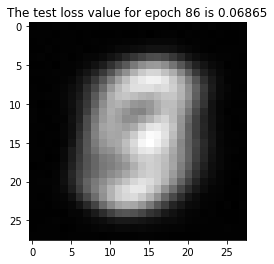

The train loss value for epoch 87 is 0.0684
The test loss value for epoch 87 is 0.0686
The sum of weights for epoch 87 is 3211.808837890625


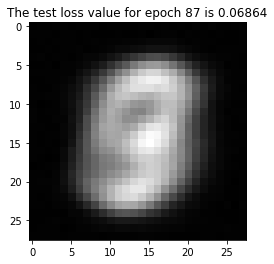

The train loss value for epoch 88 is 0.0684
The test loss value for epoch 88 is 0.0686
The sum of weights for epoch 88 is 3199.533935546875


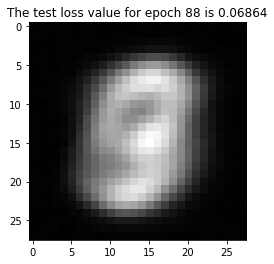

The train loss value for epoch 89 is 0.0684
The test loss value for epoch 89 is 0.0686
The sum of weights for epoch 89 is 3187.35693359375


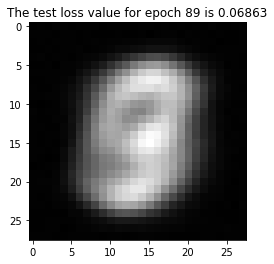

The train loss value for epoch 90 is 0.0684
The test loss value for epoch 90 is 0.0686
The sum of weights for epoch 90 is 3175.2822265625


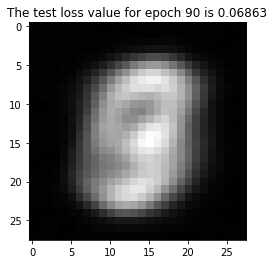

The train loss value for epoch 91 is 0.0684
The test loss value for epoch 91 is 0.0686
The sum of weights for epoch 91 is 3163.31103515625


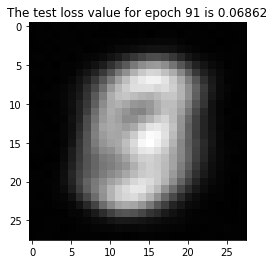

The train loss value for epoch 92 is 0.0684
The test loss value for epoch 92 is 0.0686
The sum of weights for epoch 92 is 3151.442626953125


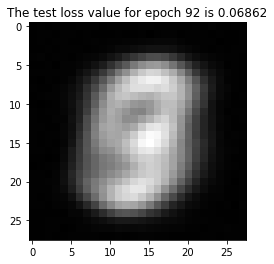

The train loss value for epoch 93 is 0.0684
The test loss value for epoch 93 is 0.0686
The sum of weights for epoch 93 is 3139.672607421875


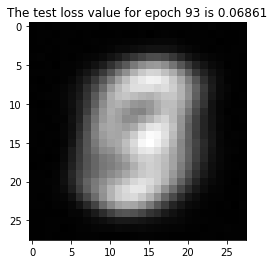

The train loss value for epoch 94 is 0.0684
The test loss value for epoch 94 is 0.0686
The sum of weights for epoch 94 is 3128.0009765625


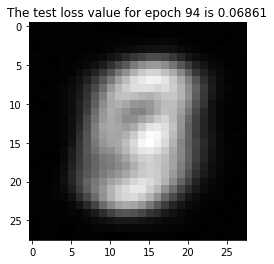

The train loss value for epoch 95 is 0.0684
The test loss value for epoch 95 is 0.0686
The sum of weights for epoch 95 is 3116.42041015625


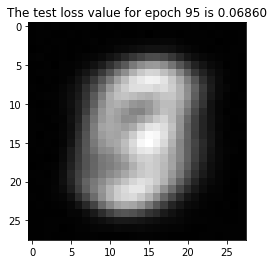

The train loss value for epoch 96 is 0.0684
The test loss value for epoch 96 is 0.0686
The sum of weights for epoch 96 is 3104.94384765625


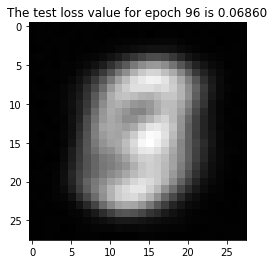

The train loss value for epoch 97 is 0.0684
The test loss value for epoch 97 is 0.0686
The sum of weights for epoch 97 is 3093.567626953125


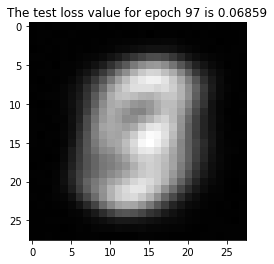

The train loss value for epoch 98 is 0.0684
The test loss value for epoch 98 is 0.0686
The sum of weights for epoch 98 is 3082.27880859375


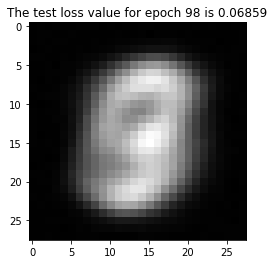

The train loss value for epoch 99 is 0.0684
The test loss value for epoch 99 is 0.0686
The sum of weights for epoch 99 is 3071.079833984375


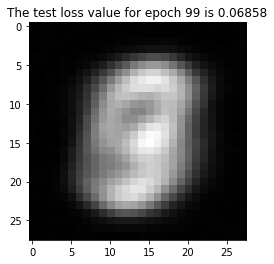

The train loss value for epoch 100 is 0.0684
The test loss value for epoch 100 is 0.0686
The sum of weights for epoch 100 is 3059.97607421875


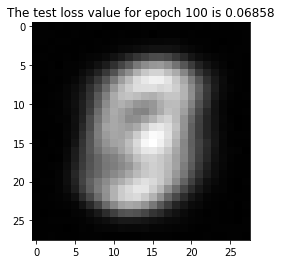

The train loss value for epoch 101 is 0.0684
The test loss value for epoch 101 is 0.0686
The sum of weights for epoch 101 is 3048.964599609375


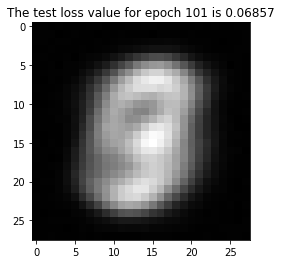

The train loss value for epoch 102 is 0.0684
The test loss value for epoch 102 is 0.0686
The sum of weights for epoch 102 is 3038.04638671875


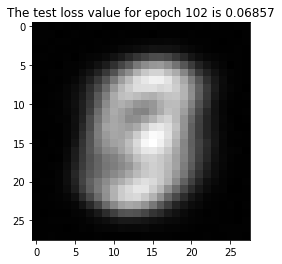

The train loss value for epoch 103 is 0.0684
The test loss value for epoch 103 is 0.0686
The sum of weights for epoch 103 is 3027.21630859375


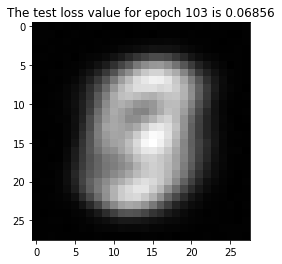

The train loss value for epoch 104 is 0.0684
The test loss value for epoch 104 is 0.0686
The sum of weights for epoch 104 is 3016.482666015625


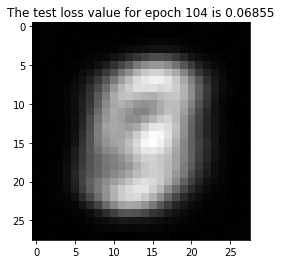

The train loss value for epoch 105 is 0.0684
The test loss value for epoch 105 is 0.0685
The sum of weights for epoch 105 is 3005.839599609375


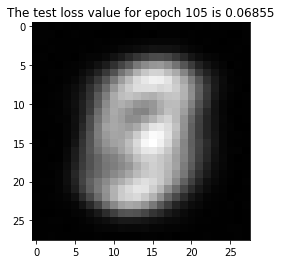

The train loss value for epoch 106 is 0.0683
The test loss value for epoch 106 is 0.0685
The sum of weights for epoch 106 is 2995.2841796875


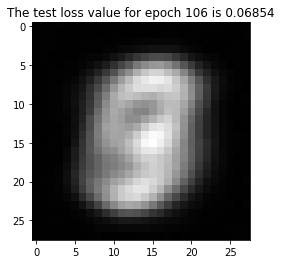

The train loss value for epoch 107 is 0.0683
The test loss value for epoch 107 is 0.0685
The sum of weights for epoch 107 is 2984.833984375


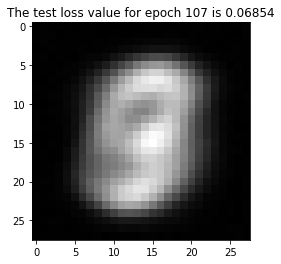

The train loss value for epoch 108 is 0.0683
The test loss value for epoch 108 is 0.0685
The sum of weights for epoch 108 is 2974.484375


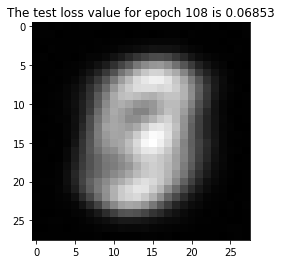

The train loss value for epoch 109 is 0.0683
The test loss value for epoch 109 is 0.0685
The sum of weights for epoch 109 is 2964.228759765625


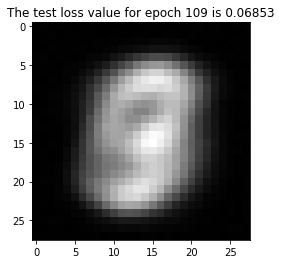

The train loss value for epoch 110 is 0.0683
The test loss value for epoch 110 is 0.0685
The sum of weights for epoch 110 is 2954.05859375


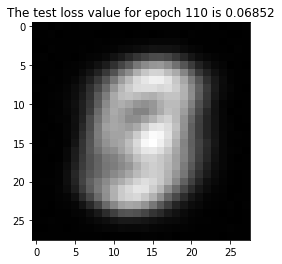

The train loss value for epoch 111 is 0.0683
The test loss value for epoch 111 is 0.0685
The sum of weights for epoch 111 is 2943.97705078125


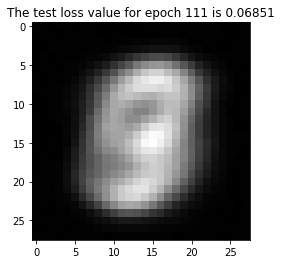

The train loss value for epoch 112 is 0.0683
The test loss value for epoch 112 is 0.0685
The sum of weights for epoch 112 is 2933.980712890625


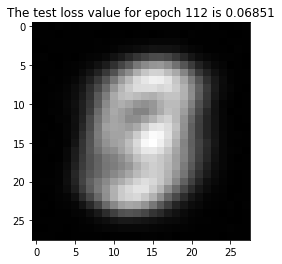

The train loss value for epoch 113 is 0.0683
The test loss value for epoch 113 is 0.0685
The sum of weights for epoch 113 is 2924.072021484375


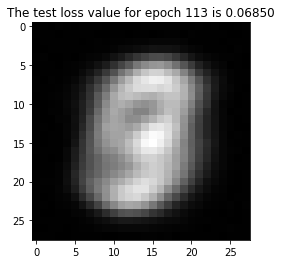

The train loss value for epoch 114 is 0.0683
The test loss value for epoch 114 is 0.0685
The sum of weights for epoch 114 is 2914.25146484375


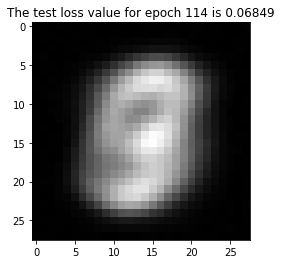

The train loss value for epoch 115 is 0.0683
The test loss value for epoch 115 is 0.0685
The sum of weights for epoch 115 is 2904.51220703125


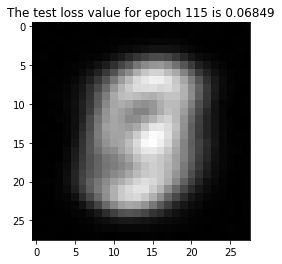

The train loss value for epoch 116 is 0.0683
The test loss value for epoch 116 is 0.0685
The sum of weights for epoch 116 is 2894.85205078125


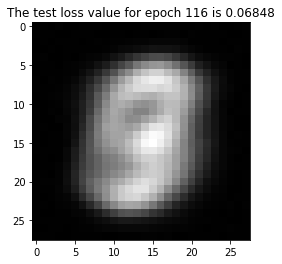

The train loss value for epoch 117 is 0.0683
The test loss value for epoch 117 is 0.0685
The sum of weights for epoch 117 is 2885.283203125


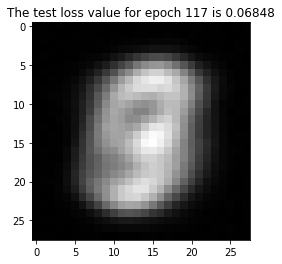

The train loss value for epoch 118 is 0.0683
The test loss value for epoch 118 is 0.0685
The sum of weights for epoch 118 is 2875.8046875


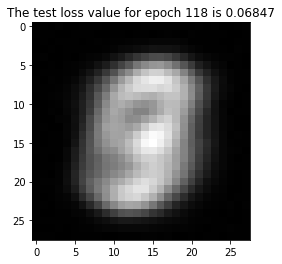

The train loss value for epoch 119 is 0.0683
The test loss value for epoch 119 is 0.0685
The sum of weights for epoch 119 is 2866.407958984375


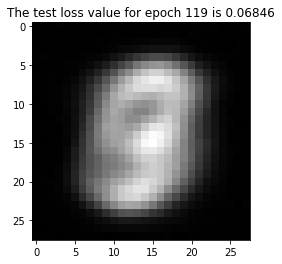

The train loss value for epoch 120 is 0.0683
The test loss value for epoch 120 is 0.0685
The sum of weights for epoch 120 is 2857.092529296875


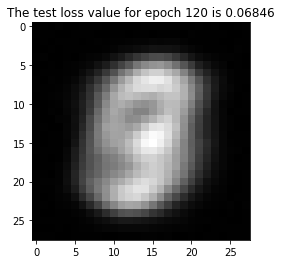

The train loss value for epoch 121 is 0.0683
The test loss value for epoch 121 is 0.0685
The sum of weights for epoch 121 is 2847.86083984375


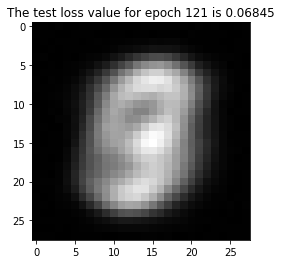

The train loss value for epoch 122 is 0.0683
The test loss value for epoch 122 is 0.0684
The sum of weights for epoch 122 is 2838.713134765625


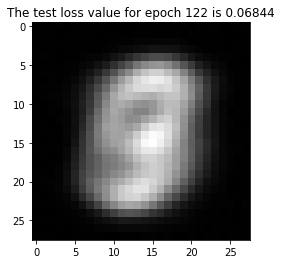

The train loss value for epoch 123 is 0.0682
The test loss value for epoch 123 is 0.0684
The sum of weights for epoch 123 is 2829.645751953125


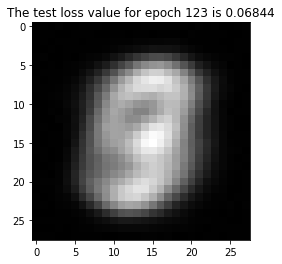

The train loss value for epoch 124 is 0.0682
The test loss value for epoch 124 is 0.0684
The sum of weights for epoch 124 is 2820.649658203125


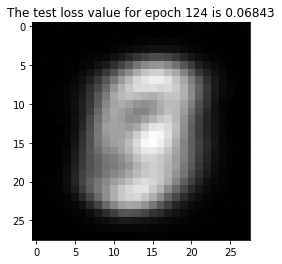

In [71]:
model = Model(x_train.shape[1], num_hidden=64)
learning_rate = .5
beta = .000005
batch_size = 128
fig = plt.figure()
epoch_num = 125
train_loss_hist = []
test_loss_hist = []
weight_sum_hist = []
for epoch in range(epoch_num):
  for start_idx in range(0, np.math.floor(x_train.shape[0]/4), batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_train[start_idx:end_idx, :]
    model.step(x_train_, x_train_, learning_rate,beta)

  train_loss = loss(x_train, model(x_train))
  test_loss = loss(x_test, model(x_test))
  weight_sum = model.weight_sum()
  train_loss_hist.append(train_loss)
  test_loss_hist.append(test_loss)
  weight_sum_hist.append(weight_sum)
  print(f'The train loss value for epoch {epoch} is {train_loss:0.4f}')
  print(f'The test loss value for epoch {epoch} is {test_loss:0.4f}')
  print(f'The sum of weights for epoch {epoch} is {weight_sum}')
  x_test_hat = model(x_test)
  test_img = np.reshape(x_test_hat[2,:], (28, 28))
  plt.imshow(test_img, cmap=plt.cm.gray)
  plt.title(f'The test loss value for epoch {epoch} is {test_loss:0.5f}')
  plt.show()


<function matplotlib.pyplot.show>

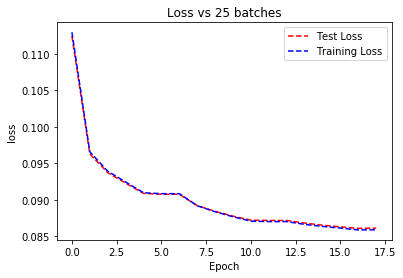

In [72]:

plt.xlabel('Epoch')
plt.ylabel('loss')
x_axis = range(len(test_loss_history))
plt.plot(x_axis, test_loss_history, 'r--')

plt.plot(x_axis, train_loss_history, 'b--')
plt.title('Loss vs 25 batches')
plt.legend(['Test Loss', 'Training Loss'])
plt.show

<function matplotlib.pyplot.show>

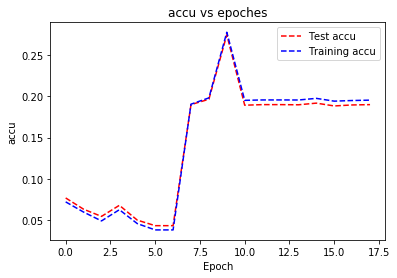

In [74]:

plt.xlabel('Epoch')
plt.ylabel('accu')
x_axis = range(len(test_accu_history))
plt.plot(x_axis, test_accu_history, 'r--')

plt.plot(x_axis, train_accu_history, 'b--')
plt.title('accu vs epoches')
plt.legend(['Test accu', 'Training accu'])
plt.show

<function matplotlib.pyplot.show>

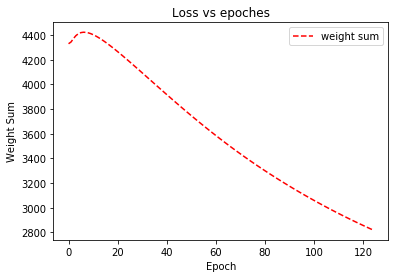

In [78]:

plt.xlabel('Epoch')
plt.ylabel('Weight Sum')
x_axis = range(len(weight_sum_hist))
plt.plot(x_axis, weight_sum_hist, 'r--')
plt.title('Loss vs epoches')
plt.legend(['weight sum', 'Training Loss'])
plt.show

How did you determine the appropriate weight regularization parameter?

It seemed like the sum of unaveraged weights were overwelming mean squared loss. Thus, I had to keep lowering the beta hyperparameter for loss to plateau at a lower value. I experimented beta = 0.01,0.005,0.0001 and 0.00005 seemed to be the most appropiate value. I also lowered learning rate, as higher learner rate did not seem to help learning efficiency.

##Question 2 Part 1
One of the [first papers](https://www.cs.toronto.edu/~hinton/science.pdf) in the deep learning literature proposed greedy layer wise training of deep neural networks. A greedy deep autoencoder first trains the first autoencoder, uses the representation to train the second autoencoder, etc. Train a greedy deep network for the MNIST data with the following layer sizes 400 - 200 - 50 - 10 - 2. Train on a random sample of 20000 MNIST rows. Use sigmoid activation layers and determine an appropriate learning rate.

In [0]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))

class Model(object):
  def __init__(self, num_inputs, num_hidden=64):
    self.b1 = tf.Variable(tf.random.uniform(
                  (1, num_hidden),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.uniform(
                  (num_inputs, num_hidden),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
    self.b2 = tf.Variable(tf.random.uniform(
                  (1, num_inputs),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
    self.W2 = tf.Variable(tf.random.uniform(
                  (num_hidden, num_inputs),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))
  def __call__(self, x):
    return self.forward(x)
  
  def encode(self, x):
    a1 = tf.nn.sigmoid(
          tf.linalg.matmul(x, self.W1) + self.b1
          )
    return a1
  
  def decode(self, h):
    a2 = tf.nn.sigmoid(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    return a2

  def forward(self, x):
    a1 = self.encode(x)
    a2 = self.decode(a1)
    return a2
  
  def step(self, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
      current_loss = loss(self(inputs), outputs)
    dW1, dW2, db1, db2 = t.gradient(current_loss, [self.W1, self.W2, self.b1, self.b2])
    
    # model.W1 = model.W1 - learning_rate * dW1
    self.W1.assign_sub(learning_rate * dW1)
    self.W2.assign_sub(learning_rate * dW2)
    self.b1.assign_sub(learning_rate * db1)
    self.b2.assign_sub(learning_rate * db2)


In [0]:
learning_rate = 0.2
batch_size = 128
epoch_num = 150

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))

model_in_400 = Model(x_train.shape[1], 400)
model_400_200 = Model(400, 200)
model_200_50 = Model(200, 50)
model_50_10 = Model(50, 10)
model_10_2 = Model(10, 2)
print("training layer 1, input to 400")
for epoch in range(epoch_num):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_train[start_idx:end_idx, :]
    model_in_400.step(x_train_, x_train_, learning_rate)

x_400 = model_in_400.encode(x_train)

print("training layer 2, 400 to 200")
for epoch in range(epoch_num):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_400[start_idx:end_idx, :]
    model_400_200.step(x_train_, x_train_, learning_rate)
    

training layer 1, input to 400
training layer 2, 400 to 200


In [0]:
x_200 = model_400_200.encode(x_400)

for epoch in range(epoch_num):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_200[start_idx:end_idx, :]
    model_200_50.step(x_train_, x_train_, learning_rate)
    
    

In [0]:
x_50 = model_200_50.encode(x_200)
print(x_50.shape)
for epoch in range(epoch_num):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_50[start_idx:end_idx, :]
    model_50_10.step(x_train_, x_train_, learning_rate)

(60000, 50)


In [0]:
x_10 = model_50_10.encode(x_50)

for epoch in range(epoch_num):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_10[start_idx:end_idx, :]
    model_10_2.step(x_train_, x_train_, learning_rate)

In [0]:
x_2 = model_10_2.encode(x_10)

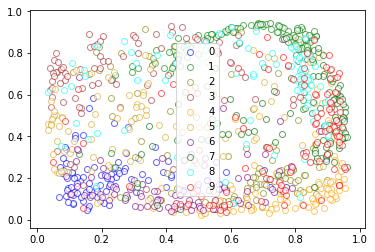

In [0]:
data = x_2
num_data = 1000

colors = ['blue', 'green', 'olive', 'brown', 'orange', 'goldenrod',
          'purple', 'darkgreen', 'aqua', 'red']

for i in range(10):
    mask = np.array([x == i for x in y_train[: num_data]])
    z = tf.boolean_mask(data[:num_data], mask)
    xs = z[:,0]
    ys = z[:,1]
    plt.scatter(xs, ys, edgecolors = colors[i], c = 'white', label=str(i), alpha = 0.6, )

plt.legend()

Plot the two dimensional representation and the associated labels for the numbers for the testing data. See figure 3B in the above paper for an example.

## Question 2 Part 2
Instead of training a multi-layer deep architecture, train just one layer of size 2. Once again use sigmoid activation functions and determine an appropriate learning rate.

In [0]:
modelSmall = Model(x_train.shape[1], 2)
for epoch in range(epoch_num):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_train[start_idx:end_idx, :]
    modelSmall.step(x_train_, x_train_, learning_rate)

Plot the two dimensional representation and the associated labels for the numbers for the testing data. See figure 3B in the above paper for an example.

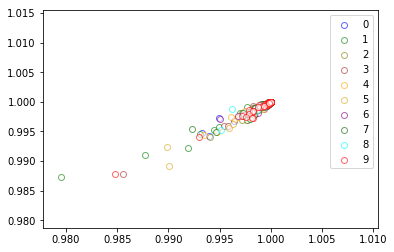

In [0]:
x_2_small = modelSmall.encode(x_test)
data = x_2_small
num_data = 1000

colors = ['blue', 'green', 'olive', 'brown', 'orange', 'goldenrod',
          'purple', 'darkgreen', 'aqua', 'red']

for i in range(10):
    mask = np.array([x == i for x in y_train[: num_data]])
    z = tf.boolean_mask(data[:num_data], mask)
    xs = z[:,0]
    ys = z[:,1]
    plt.scatter(xs, ys, edgecolors = colors[i], c = 'white', label=str(i), alpha = 0.6, )

plt.legend()

## Question 2 Part 3
Train a standard feed-forward neural network with one hidden layer of size two and sigmoid activation functions for predicting which digit each of the training samples is from.

In [68]:
import math
import random
a = .5 #learning rate. I ended up using a relatively high value for learning rate
#because 3 epochs of ~900 batches is still far from causing bounces in loss at a = 0.1 to 0.5. 
#I could justifiably crank learning rate up even more.
#I believe a dynamic learning rate is called for in this shallow network.
b_size = 64 #batch size
epoch_num = 3
initialize_seed = 5
test_frequency = 230

test_loss_history_epoch = []
train_loss_history_epoch = []


record_frequency = 10
test_loss_history = []
train_loss_history= []

test_accu_history = []
train_accu_history = []


  
y_train_oh = tf.one_hot(y_train,10)
y_test_oh = tf.one_hot(y_test,10)

class MyModel():
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.w1 = tf.get_variable("w1", (64,2),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.w2 = tf.get_variable("w2", (2,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b1 = tf.get_variable("b1", (1,2),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b2 = tf.get_variable("b2", (1,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.dw = [] 
    self.db = []
  
  def __call__(self, input):
    A1 = tf.matmul(input, self.w1) + tf.broadcast_to(self.b1, tf.matmul(input, self.w1).shape)
    A1 = tf.sigmoid(A1)
    A2 = tf.matmul(A1,self.w2) + tf.broadcast_to(self.b2, tf.matmul(A1,self.w2).shape)
    A2 = tf.nn.softmax(A2)
    return A2
  
  def update(self, dw, db, learning_rate = 0.1):
    self.w1 = tf.math.subtract(self.w1, tf.math.multiply(dw[0],learning_rate))
    self.w2 = tf.math.subtract(self.w2, tf.math.multiply(dw[1],learning_rate))
    self.b1 = tf.math.subtract(self.b1, tf.math.multiply(db[0],learning_rate))
    self.b2 = tf.math.subtract(self.b2, tf.math.multiply(db[1],learning_rate))
  
  def encode(self, input):
    A1 = tf.matmul(input, self.w1) + tf.broadcast_to(self.b1, tf.matmul(input, self.w1).shape)
    A1 = tf.sigmoid(A1)
    return A1
  
def train_batch(model, inputs, outputs, learning_rate):
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(model.w2)
    tape.watch(model.w1)
    tape.watch(model.b1)
    tape.watch(model.b2)
    current_loss = loss(outputs,model(inputs))
  [w1_grad] = tape.gradient(current_loss, [model.w1])
  [w2_grad] = tape.gradient(current_loss, [model.w2])
  [b1_grad] = tape.gradient(current_loss, [model.b1])
  [b2_grad] = tape.gradient(current_loss, [model.b2])
  model.update([w1_grad,w2_grad],[b1_grad,b2_grad],a)
  del tape

def train(model, input, labels, learning_rate, num_epoch = 1, batch_size = 64, small_data = False):
  batch_counter = 0
  for cur_epoch in range(0, num_epoch):
    seed = math.floor(100*random.random())
    input_batches, label_batches, batch_num = batchize(input, labels, batch_size, seed)
    print("Number of batches : {}".format(len(input_batches)))
    if small_data:
      batch_num = math.ceil(batch_num/5)
    for cur_batch in range(0, batch_num):
      batch_counter += 1
      if cur_batch % test_frequency == 0:
        train_acc, train_loss = test(model, input, labels)
        test_acc, test_loss = test(model, x_presentation_test, y_test_oh)
        test_loss_history.append(test_loss)
        train_loss_history.append(train_loss)
        test_accu_history.append(test_acc)
        train_accu_history.append(train_acc)
        print("train accu {} loss {}, test accu {} loss {}".format(train_acc, train_loss, test_acc, test_loss))
        
      print("Training {} batch of {} epoch".format(cur_batch + 1,cur_epoch + 1))
      input_batch = input_batches[cur_batch]
      label_batch = label_batches[cur_batch]
      train_batch(model,input_batch,label_batch,learning_rate)
    train_acc, train_loss = test(model, input, labels)
    test_acc, test_loss = test(model, x_presentation_test , y_test_oh)
    test_loss_history.append(test_loss)
    train_loss_history.append(train_loss)
    test_accu_history.append(test_acc)
    train_accu_history.append(train_acc)
    
    test_c, test_total, test_loss = test(model, x_presentation_test , y_test_oh,False)
    print("Final Model Test Accuracy {}/{} Test Loss {}".format(test_c, test_total, test_loss))
    print("Epoch {} Testing loss{}".format(cur_epoch, test_loss))
  print("Total Batch Trained {} with size{}".format(batch_counter, batch_size))
  

def batchize(input, labels, batch_size = 64, seed = 10):
  tf.random.shuffle(input,seed)
  tf.random.shuffle(labels,seed)
  sample_num = input.shape[0]
  assert(input.shape[0] == labels.shape[0])
  input_batches = []
  label_batches = []
  i = 0
  while (i + 1) * batch_size < sample_num:
    input_batches.append(input[i:i+batch_size])
    label_batches.append(labels[i:i+batch_size])
    i = i + 1
  input_batches.append(input[i:])
  label_batches.append(labels[i:])
  return[input_batches, label_batches, i]
    

  
    
  
def loss(desired_y,predicted_y):
  return tf.losses.mean_squared_error(desired_y, predicted_y)

def test(model, inputs = x_presentation_test, labels = y_test_oh, percentage = True):
  total = 0
  correct = 0
  prediction = model(inputs)
  num_tests = inputs.shape[0]
  for i in range(0, num_tests):
    pred = tf.math.argmax(input = prediction[i]).numpy()
    label = tf.math.argmax(input = labels[i]).numpy()
    if(label == pred):
      correct += 1
      total += 1
    else:
      total += 1
  accuracy = 1.0*correct/total
  print("Total {}, correct {}".format(total, correct))
  if percentage is True:
    return [correct/total, loss(prediction, labels)]
  return [correct, total, loss(prediction, labels)]
      
print(x_presentation_train.shape)
  
predictiveModel = MyModel()
train(predictiveModel, x_presentation_train, y_train_oh, a,epoch_num, b_size)

(60000, 64)
Number of batches : 938
Total 60000, correct 4336
Total 10000, correct 770
train accu 0.07226666666666667 loss 0.11298514157533646, test accu 0.077 loss 0.11245070397853851
Training 1 batch of 1 epoch
Training 2 batch of 1 epoch
Training 3 batch of 1 epoch
Training 4 batch of 1 epoch
Training 5 batch of 1 epoch
Training 6 batch of 1 epoch
Training 7 batch of 1 epoch
Training 8 batch of 1 epoch
Training 9 batch of 1 epoch
Training 10 batch of 1 epoch
Training 11 batch of 1 epoch
Training 12 batch of 1 epoch
Training 13 batch of 1 epoch
Training 14 batch of 1 epoch
Training 15 batch of 1 epoch
Training 16 batch of 1 epoch
Training 17 batch of 1 epoch
Training 18 batch of 1 epoch
Training 19 batch of 1 epoch
Training 20 batch of 1 epoch
Training 21 batch of 1 epoch
Training 22 batch of 1 epoch
Training 23 batch of 1 epoch
Training 24 batch of 1 epoch
Training 25 batch of 1 epoch
Training 26 batch of 1 epoch
Training 27 batch of 1 epoch
Training 28 batch of 1 epoch
Training 29 

Pot the loss function and accuracy of your model

<function matplotlib.pyplot.show>

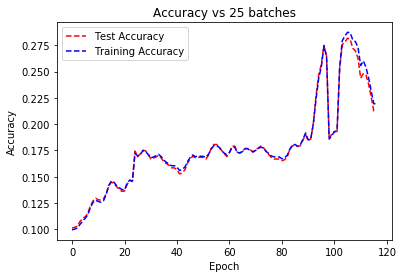

In [0]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(len(test_accu_history))
plt.plot(x_axis, test_accu_history, 'r--')

plt.plot(x_axis, train_accu_history, 'b--')
plt.title('Accuracy vs 25 batches')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

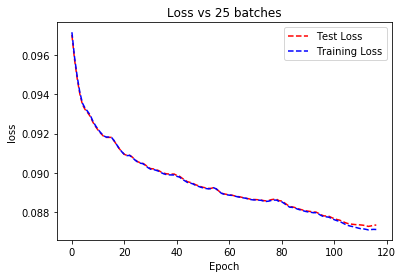

In [0]:

plt.xlabel('Epoch')
plt.ylabel('loss')
x_axis = range(len(test_loss_history))
plt.plot(x_axis, test_loss_history, 'r--')

plt.plot(x_axis, train_loss_history, 'b--')
plt.title('Loss vs 25 batches')
plt.legend(['Test Loss', 'Training Loss'])
plt.show

Plot the two dimensional representation and the associated labels for the numbers for the testing data. See figure 3B in the above paper for an example.

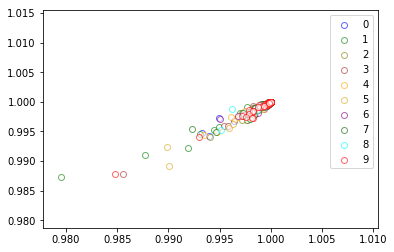

In [69]:
x_2_predictve = predictiveModel.encode(x_presentation_train)
data = x_2_small
num_data = 1000

colors = ['blue', 'green', 'olive', 'brown', 'orange', 'goldenrod',
          'purple', 'darkgreen', 'aqua', 'red']

for i in range(10):
    mask = np.array([x == i for x in y_train[: num_data]])
    z = tf.boolean_mask(data[:num_data], mask)
    xs = z[:,0]
    ys = z[:,1]
    plt.scatter(xs, ys, edgecolors = colors[i], c = 'white', label=str(i), alpha = 0.6, )

plt.legend()

## Question 2 Part 4
How different are the representations that the different approaches learned? What might make them different?

Greedy training by steadily decreasing demensions allowed for much more distinguishable labels in the two demensional encoding than that when we suddenly decrease demension or when we train for a different task than autoencoding. This distinguiability is suggestive of a very meaningful encoding. 
Observing from the later two methods, the distribution of encodings for all mnist photos fall on a straight line. I believe this can be attributed to the scarcity of non-linearity on shallow models. Therefore, I would have experimented a sudden decrease in demension, but with multiple in-between layers of 2 nodes to introduce more non-linearity without increasing parameters too much.

# Question 3 Part 1
Build a denoising autoencoder for the MNIST data. On each batch, add random [normal gaussian noise](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) to the inputs and then [clip the values](https://docs.scipy.org/doc/numpy/reference/generated/numpy.clip.html) such that they are between 0 and 1. Evaluate the following mean and standard deviation values for the noise.

| Mean  | Standard Deviation |
|-------|--------------------|
| (loc) | (scale)            |
| 0.0   | 0.05               |
| 0.1   | 0.05               |
| 0.0   | 0.2                |
| 0.1   | 0.2                |

Your evaluation should compare the reconstruction error on the testing data with no added error. Use sigmoid activation functions with 64 hidden units.

I trained the other 3 configurations for the noise, but I lost the models after I restarted this notebook. This configuration workered the best for part 2.

float32


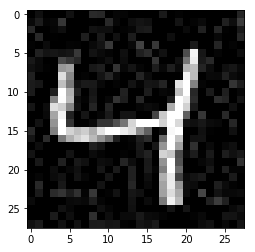

In [0]:
def add_gaussian_noise(x, mean, std):
  noise = np.random.normal(mean,std,x.shape)
  x_noisy = np.clip(x + noise, 0, 1)
  return x_noisy
x_noisy = add_gaussian_noise(x_train,0.0,0.1)
x_noisy = x_noisy.astype('float32')
print(x_noisy.dtype)
test_img = np.reshape(x_noisy[2,:], (28, 28))
plt.imshow(test_img, cmap=plt.cm.gray)
plt.show()

In [0]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))


class Model(object):
  def __init__(self, num_inputs, num_hidden=64):
    self.b1 = tf.Variable(tf.random.uniform(
                  (1, num_hidden),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.uniform(
                  (num_inputs, num_hidden),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
    self.b2 = tf.Variable(tf.random.uniform(
                  (1, num_inputs),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
    self.W2 = tf.Variable(tf.random.uniform(
                  (num_hidden, num_inputs),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))
  def __call__(self, x):
    return self.forward(x)
  
  def encode(self, x):
    a1 = tf.nn.sigmoid(
          tf.linalg.matmul(x, self.W1) + self.b1
          )
    return a1
  
  def decode(self, h):
    a2 = tf.nn.sigmoid(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    return a2
  
  def weight_sum(self):
    sum = 0
    sum += tf.math.reduce_sum(tf.abs(self.W1))
    sum += tf.math.reduce_sum(tf.abs(self.W2))
    sum += tf.math.reduce_sum(tf.abs(self.b1))
    sum += tf.math.reduce_sum(tf.abs(self.b2))
    return sum
  
  def forward(self, x):
    a1 = self.encode(x)
    a2 = self.decode(a1)
    return a2
  
  def step(self, inputs, outputs, learning_rate, beta):
    with tf.GradientTape() as t:
      current_loss = loss(self(inputs), outputs) + beta * self.weight_sum()
    dW1, dW2, db1, db2 = t.gradient(current_loss, [self.W1, self.W2, self.b1, self.b2])
    
    # model.W1 = model.W1 - learning_rate * dW1
    self.W1.assign_sub(learning_rate * dW1)
    self.W2.assign_sub(learning_rate * dW2)
    self.b1.assign_sub(learning_rate * db1)
    self.b2.assign_sub(learning_rate * db2)
  
  def enum_layers(self):
    return [self.W1, self.W2, self.b1, self.b2]


The train loss value for epoch 0 is 0.106132
The test loss value for epoch 0 is 0.107436


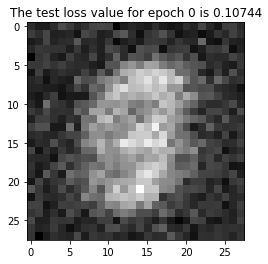

The train loss value for epoch 1 is 0.080782
The test loss value for epoch 1 is 0.081754


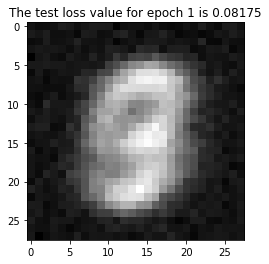

The train loss value for epoch 2 is 0.075202
The test loss value for epoch 2 is 0.075972


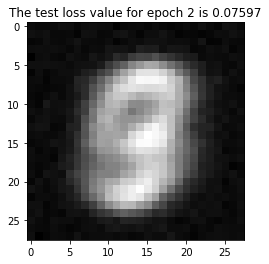

The train loss value for epoch 3 is 0.072984
The test loss value for epoch 3 is 0.073643


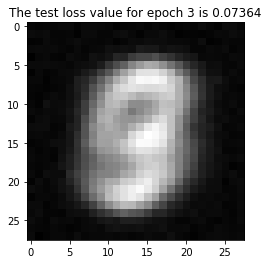

The train loss value for epoch 4 is 0.071821
The test loss value for epoch 4 is 0.072412


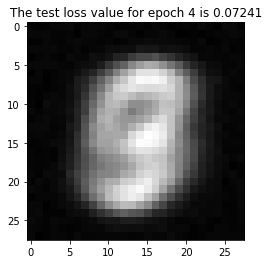

The train loss value for epoch 5 is 0.071112
The test loss value for epoch 5 is 0.071656


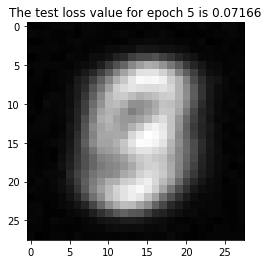

The train loss value for epoch 6 is 0.070637
The test loss value for epoch 6 is 0.071148


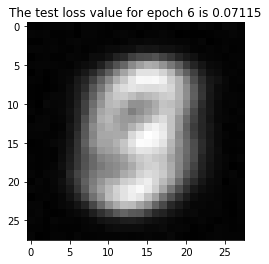

The train loss value for epoch 7 is 0.070297
The test loss value for epoch 7 is 0.070783


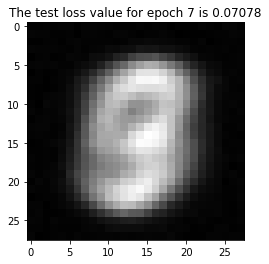

The train loss value for epoch 8 is 0.070043
The test loss value for epoch 8 is 0.070509


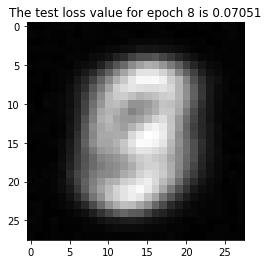

The train loss value for epoch 9 is 0.069846
The test loss value for epoch 9 is 0.070296


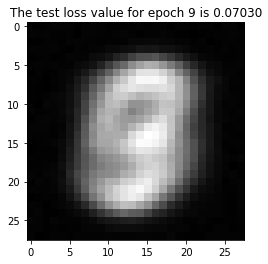

The train loss value for epoch 10 is 0.069688
The test loss value for epoch 10 is 0.070125


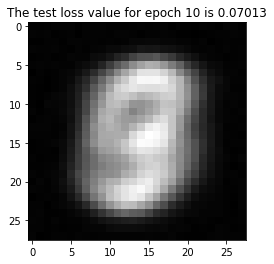

The train loss value for epoch 11 is 0.069560
The test loss value for epoch 11 is 0.069986


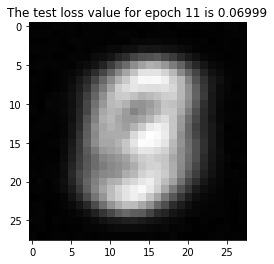

The train loss value for epoch 12 is 0.069454
The test loss value for epoch 12 is 0.069870


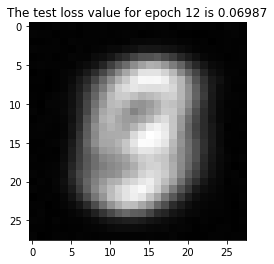

The train loss value for epoch 13 is 0.069364
The test loss value for epoch 13 is 0.069771


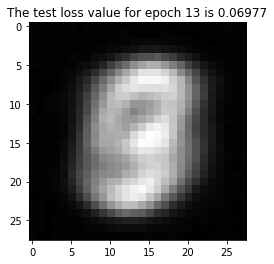

The train loss value for epoch 14 is 0.069286
The test loss value for epoch 14 is 0.069687


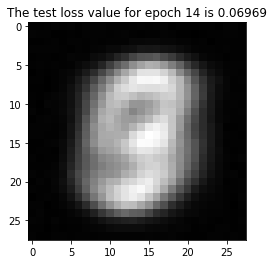

The train loss value for epoch 15 is 0.069219
The test loss value for epoch 15 is 0.069613


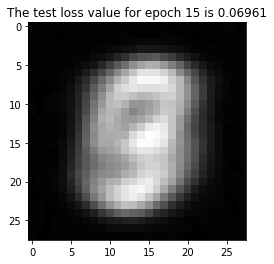

The train loss value for epoch 16 is 0.069161
The test loss value for epoch 16 is 0.069548


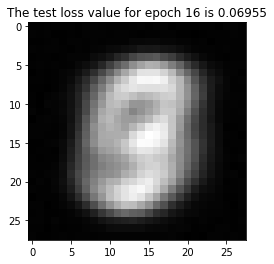

The train loss value for epoch 17 is 0.069108
The test loss value for epoch 17 is 0.069490


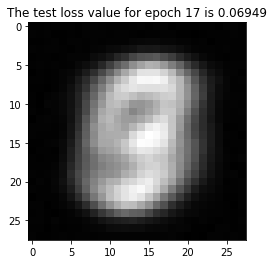

The train loss value for epoch 18 is 0.069061
The test loss value for epoch 18 is 0.069438


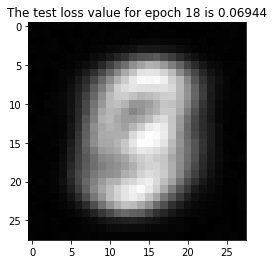

The train loss value for epoch 19 is 0.069019
The test loss value for epoch 19 is 0.069390


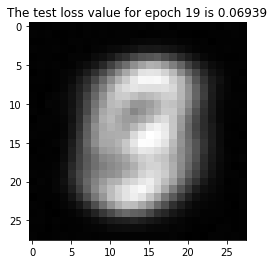

The train loss value for epoch 20 is 0.068979
The test loss value for epoch 20 is 0.069346


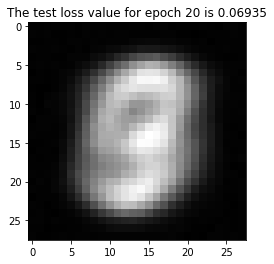

The train loss value for epoch 21 is 0.068943
The test loss value for epoch 21 is 0.069305


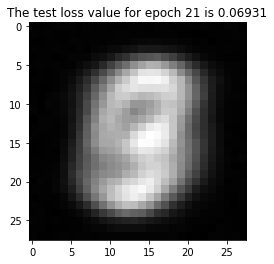

The train loss value for epoch 22 is 0.068908
The test loss value for epoch 22 is 0.069266


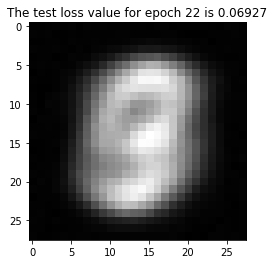

The train loss value for epoch 23 is 0.068875
The test loss value for epoch 23 is 0.069229


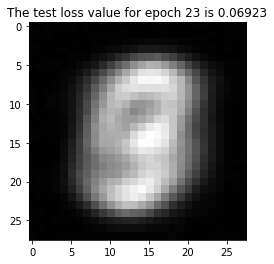

The train loss value for epoch 24 is 0.068843
The test loss value for epoch 24 is 0.069193


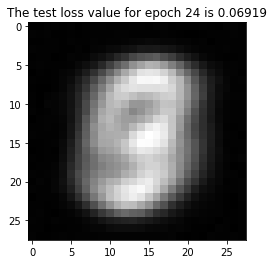

The train loss value for epoch 25 is 0.068812
The test loss value for epoch 25 is 0.069157


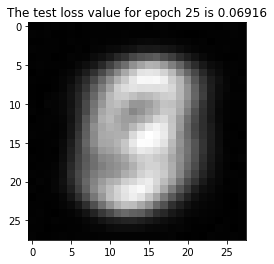

The train loss value for epoch 26 is 0.068780
The test loss value for epoch 26 is 0.069121


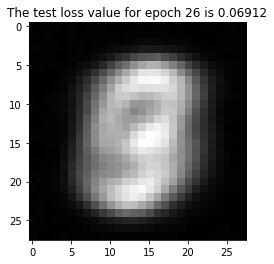

The train loss value for epoch 27 is 0.068748
The test loss value for epoch 27 is 0.069085


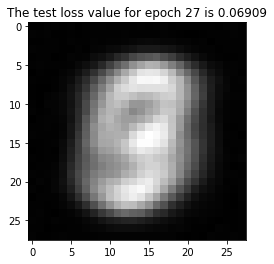

The train loss value for epoch 28 is 0.068716
The test loss value for epoch 28 is 0.069048


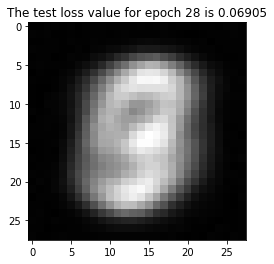

The train loss value for epoch 29 is 0.068682
The test loss value for epoch 29 is 0.069009


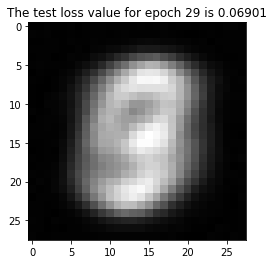

The train loss value for epoch 30 is 0.068646
The test loss value for epoch 30 is 0.068969


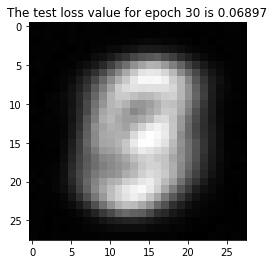

The train loss value for epoch 31 is 0.068608
The test loss value for epoch 31 is 0.068926


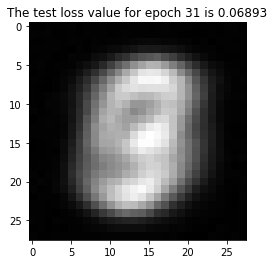

The train loss value for epoch 32 is 0.068567
The test loss value for epoch 32 is 0.068879


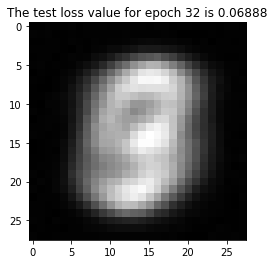

The train loss value for epoch 33 is 0.068522
The test loss value for epoch 33 is 0.068829


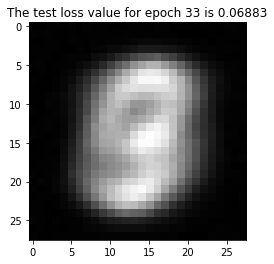

The train loss value for epoch 34 is 0.068473
The test loss value for epoch 34 is 0.068774


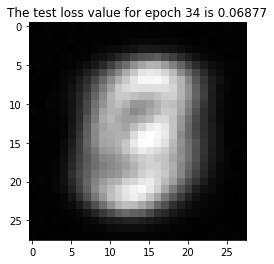

The train loss value for epoch 35 is 0.068419
The test loss value for epoch 35 is 0.068714


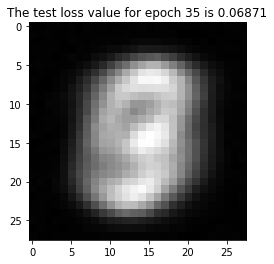

The train loss value for epoch 36 is 0.068361
The test loss value for epoch 36 is 0.068649


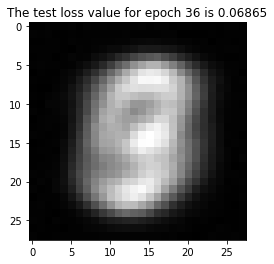

The train loss value for epoch 37 is 0.068296
The test loss value for epoch 37 is 0.068577


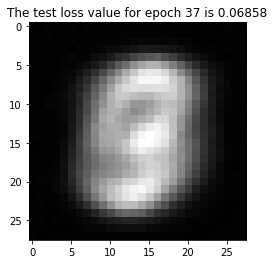

The train loss value for epoch 38 is 0.068226
The test loss value for epoch 38 is 0.068499


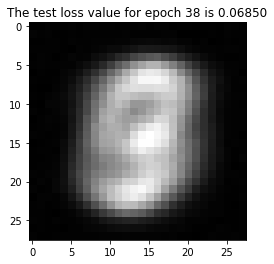

The train loss value for epoch 39 is 0.068150
The test loss value for epoch 39 is 0.068414


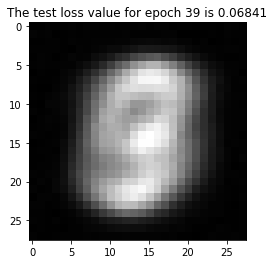

The train loss value for epoch 40 is 0.068067
The test loss value for epoch 40 is 0.068322


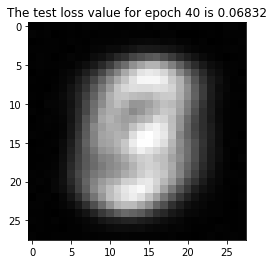

The train loss value for epoch 41 is 0.067976
The test loss value for epoch 41 is 0.068223


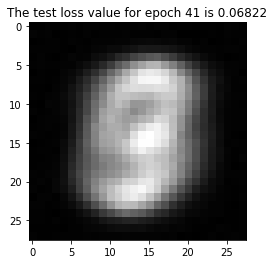

The train loss value for epoch 42 is 0.067879
The test loss value for epoch 42 is 0.068116


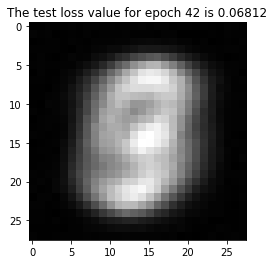

The train loss value for epoch 43 is 0.067775
The test loss value for epoch 43 is 0.068001


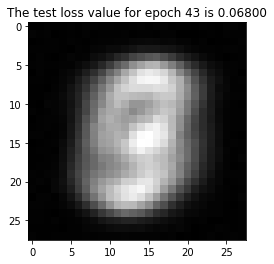

The train loss value for epoch 44 is 0.067663
The test loss value for epoch 44 is 0.067879


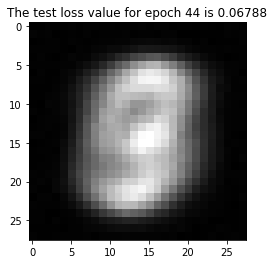

The train loss value for epoch 45 is 0.067544
The test loss value for epoch 45 is 0.067748


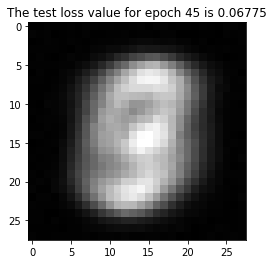

The train loss value for epoch 46 is 0.067417
The test loss value for epoch 46 is 0.067611


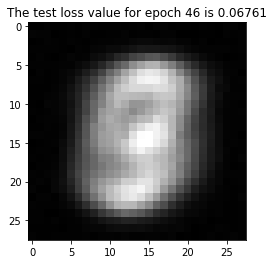

The train loss value for epoch 47 is 0.067283
The test loss value for epoch 47 is 0.067465


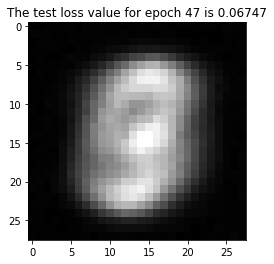

The train loss value for epoch 48 is 0.067143
The test loss value for epoch 48 is 0.067313


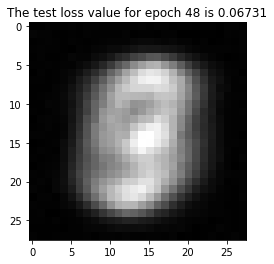

The train loss value for epoch 49 is 0.066995
The test loss value for epoch 49 is 0.067153


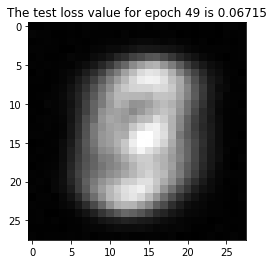

The train loss value for epoch 50 is 0.066841
The test loss value for epoch 50 is 0.066987


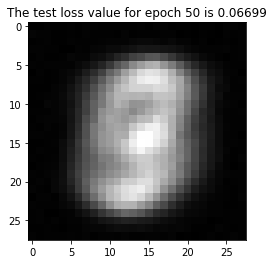

The train loss value for epoch 51 is 0.066681
The test loss value for epoch 51 is 0.066815


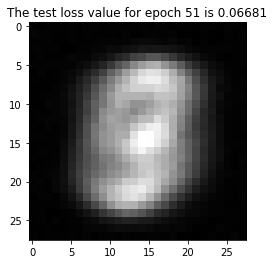

The train loss value for epoch 52 is 0.066515
The test loss value for epoch 52 is 0.066636


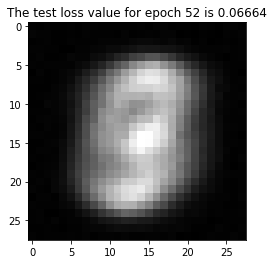

The train loss value for epoch 53 is 0.066344
The test loss value for epoch 53 is 0.066453


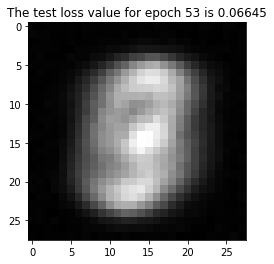

The train loss value for epoch 54 is 0.066169
The test loss value for epoch 54 is 0.066265


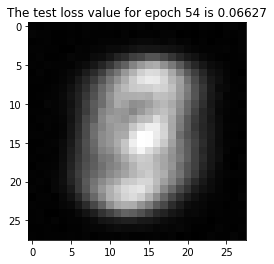

The train loss value for epoch 55 is 0.065989
The test loss value for epoch 55 is 0.066074


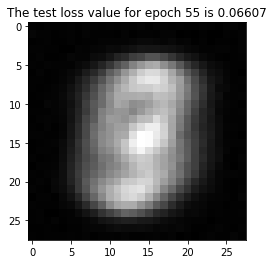

The train loss value for epoch 56 is 0.065806
The test loss value for epoch 56 is 0.065878


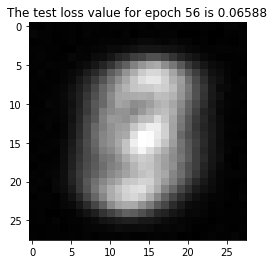

The train loss value for epoch 57 is 0.065621
The test loss value for epoch 57 is 0.065681


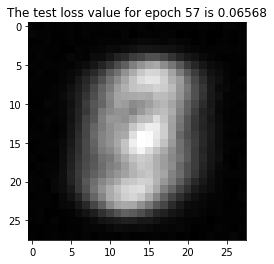

The train loss value for epoch 58 is 0.065433
The test loss value for epoch 58 is 0.065481


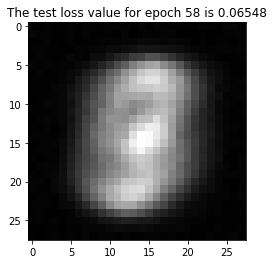

The train loss value for epoch 59 is 0.065243
The test loss value for epoch 59 is 0.065280


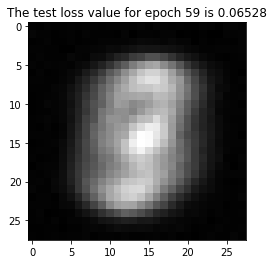

The train loss value for epoch 60 is 0.065053
The test loss value for epoch 60 is 0.065079


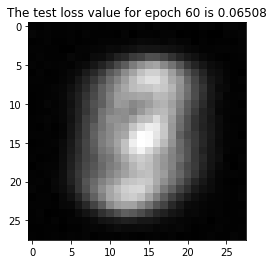

The train loss value for epoch 61 is 0.064862
The test loss value for epoch 61 is 0.064877


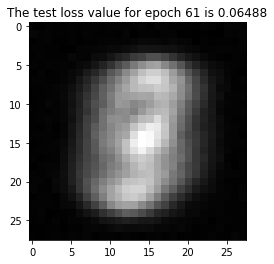

The train loss value for epoch 62 is 0.064672
The test loss value for epoch 62 is 0.064675


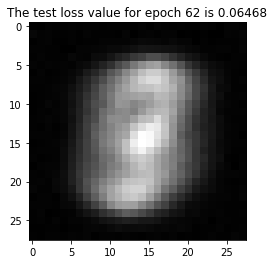

The train loss value for epoch 63 is 0.064481
The test loss value for epoch 63 is 0.064475


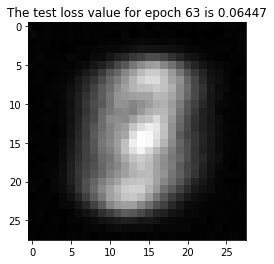

The train loss value for epoch 64 is 0.064292
The test loss value for epoch 64 is 0.064275


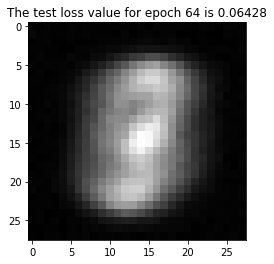

The train loss value for epoch 65 is 0.064103
The test loss value for epoch 65 is 0.064077


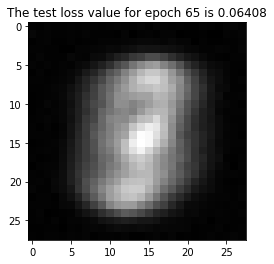

The train loss value for epoch 66 is 0.063916
The test loss value for epoch 66 is 0.063881


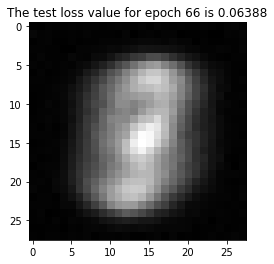

The train loss value for epoch 67 is 0.063730
The test loss value for epoch 67 is 0.063686


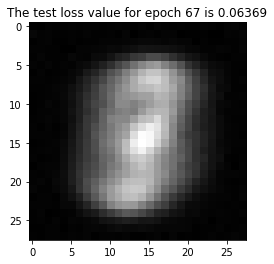

The train loss value for epoch 68 is 0.063546
The test loss value for epoch 68 is 0.063493


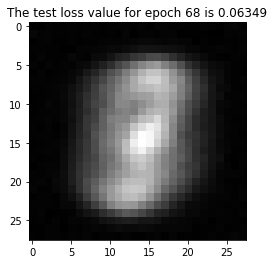

The train loss value for epoch 69 is 0.063364
The test loss value for epoch 69 is 0.063302


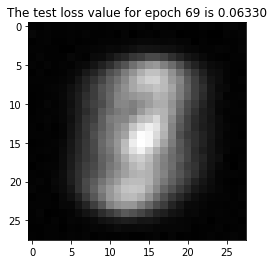

The train loss value for epoch 70 is 0.063183
The test loss value for epoch 70 is 0.063114


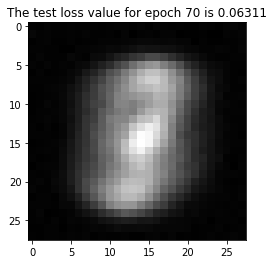

The train loss value for epoch 71 is 0.063005
The test loss value for epoch 71 is 0.062927


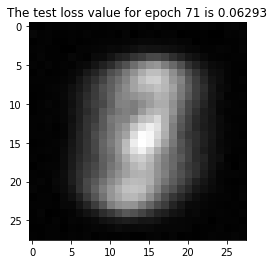

The train loss value for epoch 72 is 0.062828
The test loss value for epoch 72 is 0.062743


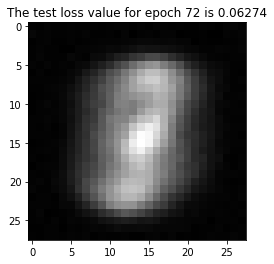

The train loss value for epoch 73 is 0.062653
The test loss value for epoch 73 is 0.062561


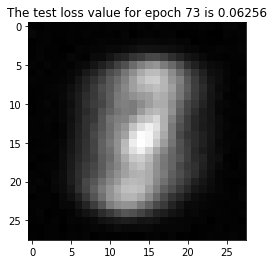

The train loss value for epoch 74 is 0.062480
The test loss value for epoch 74 is 0.062381


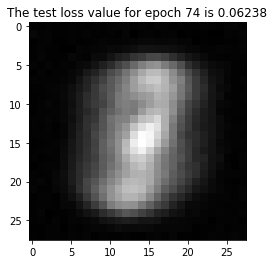

The train loss value for epoch 75 is 0.062309
The test loss value for epoch 75 is 0.062204


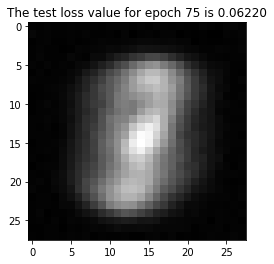

The train loss value for epoch 76 is 0.062140
The test loss value for epoch 76 is 0.062028


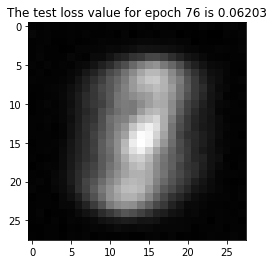

The train loss value for epoch 77 is 0.061974
The test loss value for epoch 77 is 0.061855


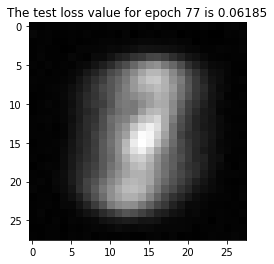

The train loss value for epoch 78 is 0.061809
The test loss value for epoch 78 is 0.061684


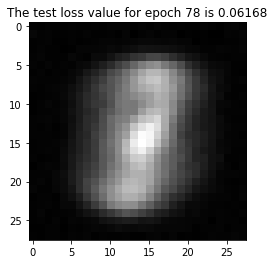

The train loss value for epoch 79 is 0.061646
The test loss value for epoch 79 is 0.061515


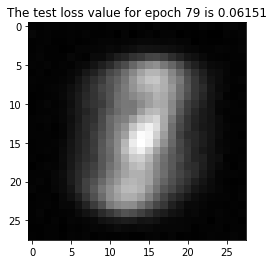

The train loss value for epoch 80 is 0.061485
The test loss value for epoch 80 is 0.061348


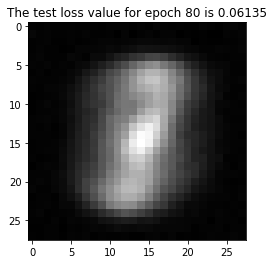

The train loss value for epoch 81 is 0.061326
The test loss value for epoch 81 is 0.061183


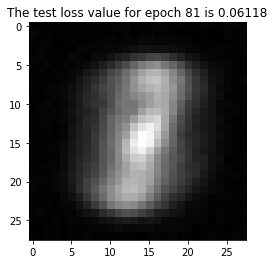

The train loss value for epoch 82 is 0.061169
The test loss value for epoch 82 is 0.061020


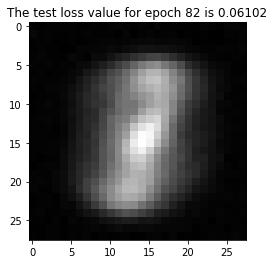

The train loss value for epoch 83 is 0.061013
The test loss value for epoch 83 is 0.060859


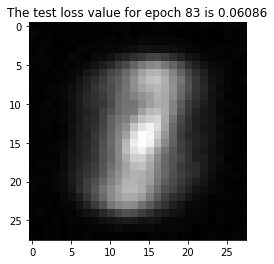

The train loss value for epoch 84 is 0.060859
The test loss value for epoch 84 is 0.060699


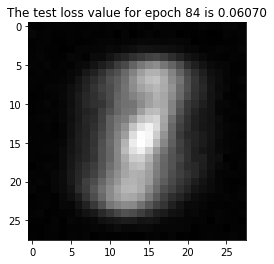

The train loss value for epoch 85 is 0.060707
The test loss value for epoch 85 is 0.060542


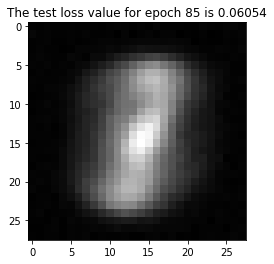

The train loss value for epoch 86 is 0.060556
The test loss value for epoch 86 is 0.060385


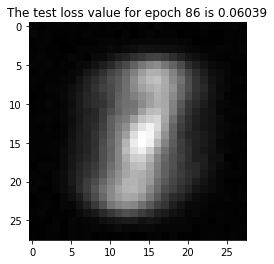

The train loss value for epoch 87 is 0.060406
The test loss value for epoch 87 is 0.060231


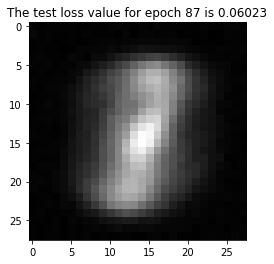

The train loss value for epoch 88 is 0.060258
The test loss value for epoch 88 is 0.060078


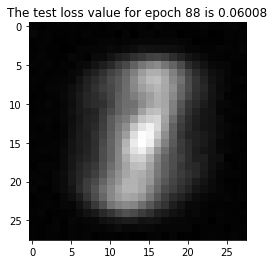

The train loss value for epoch 89 is 0.060111
The test loss value for epoch 89 is 0.059926


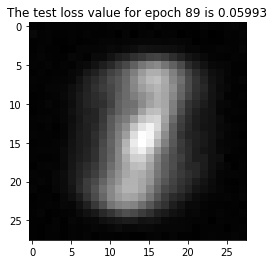

The train loss value for epoch 90 is 0.059966
The test loss value for epoch 90 is 0.059776


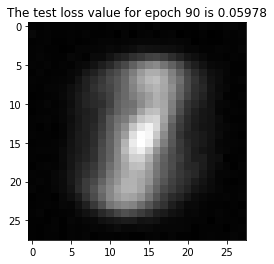

The train loss value for epoch 91 is 0.059822
The test loss value for epoch 91 is 0.059627


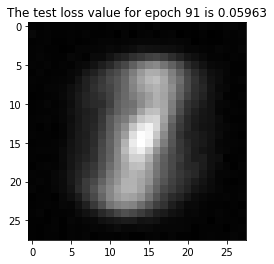

The train loss value for epoch 92 is 0.059679
The test loss value for epoch 92 is 0.059479


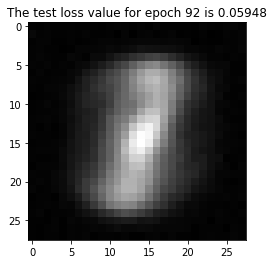

The train loss value for epoch 93 is 0.059537
The test loss value for epoch 93 is 0.059333


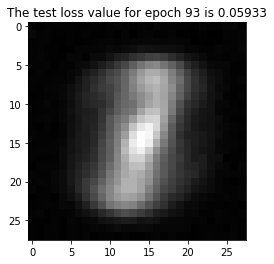

The train loss value for epoch 94 is 0.059396
The test loss value for epoch 94 is 0.059188


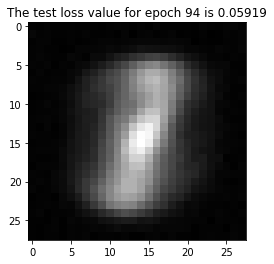

The train loss value for epoch 95 is 0.059256
The test loss value for epoch 95 is 0.059044


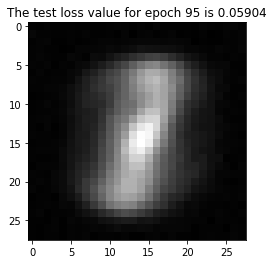

The train loss value for epoch 96 is 0.059118
The test loss value for epoch 96 is 0.058901


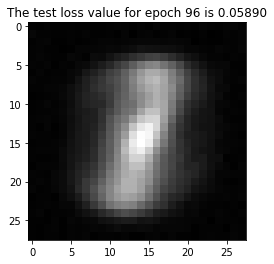

The train loss value for epoch 97 is 0.058980
The test loss value for epoch 97 is 0.058760


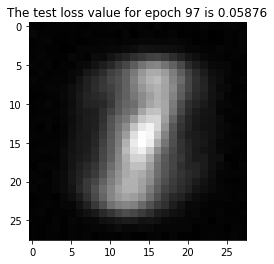

The train loss value for epoch 98 is 0.058844
The test loss value for epoch 98 is 0.058619


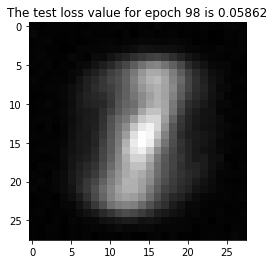

The train loss value for epoch 99 is 0.058708
The test loss value for epoch 99 is 0.058480


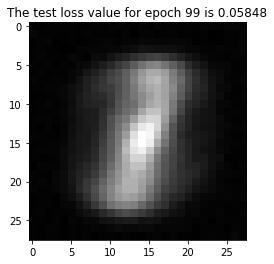

The train loss value for epoch 100 is 0.058574
The test loss value for epoch 100 is 0.058342


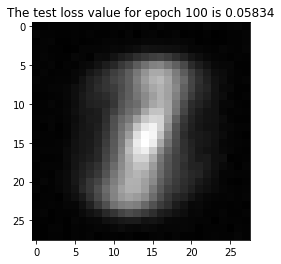

The train loss value for epoch 101 is 0.058440
The test loss value for epoch 101 is 0.058205


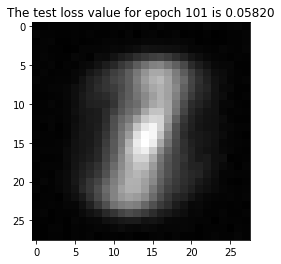

The train loss value for epoch 102 is 0.058308
The test loss value for epoch 102 is 0.058068


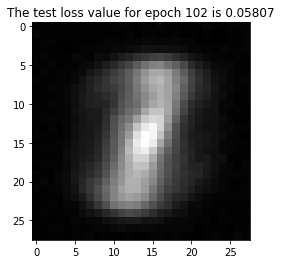

The train loss value for epoch 103 is 0.058176
The test loss value for epoch 103 is 0.057933


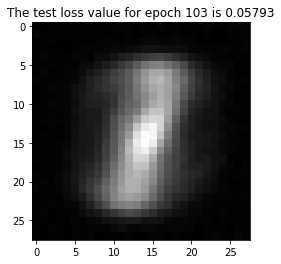

The train loss value for epoch 104 is 0.058045
The test loss value for epoch 104 is 0.057799


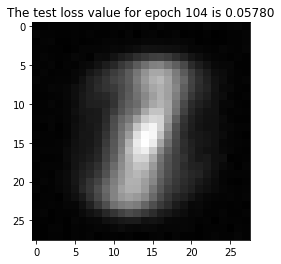

The train loss value for epoch 105 is 0.057915
The test loss value for epoch 105 is 0.057665


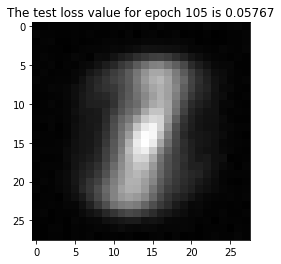

The train loss value for epoch 106 is 0.057785
The test loss value for epoch 106 is 0.057533


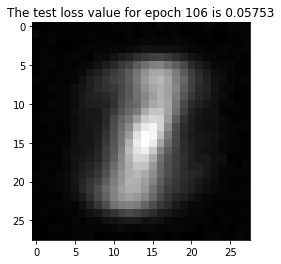

The train loss value for epoch 107 is 0.057657
The test loss value for epoch 107 is 0.057401


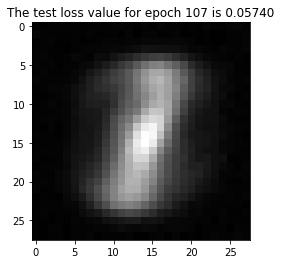

The train loss value for epoch 108 is 0.057529
The test loss value for epoch 108 is 0.057271


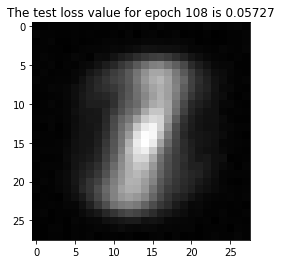

The train loss value for epoch 109 is 0.057402
The test loss value for epoch 109 is 0.057141


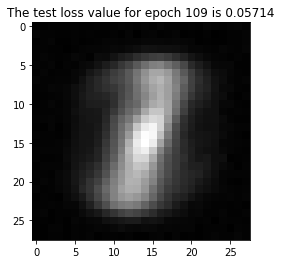

The train loss value for epoch 110 is 0.057276
The test loss value for epoch 110 is 0.057012


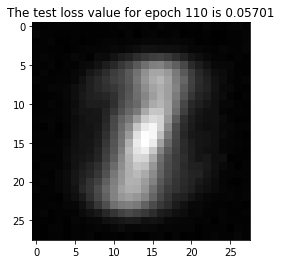

The train loss value for epoch 111 is 0.057150
The test loss value for epoch 111 is 0.056883


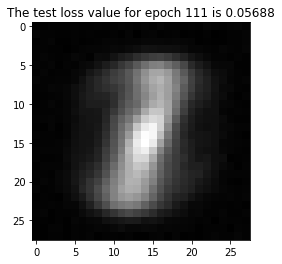

The train loss value for epoch 112 is 0.057025
The test loss value for epoch 112 is 0.056755


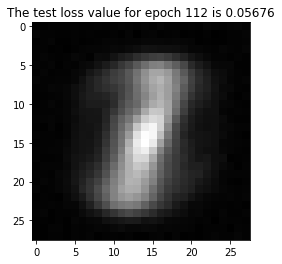

The train loss value for epoch 113 is 0.056901
The test loss value for epoch 113 is 0.056628


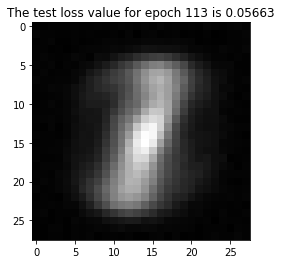

The train loss value for epoch 114 is 0.056777
The test loss value for epoch 114 is 0.056502


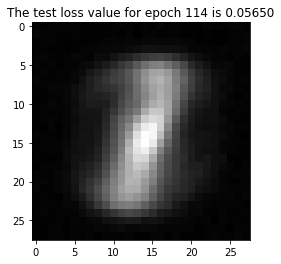

The train loss value for epoch 115 is 0.056654
The test loss value for epoch 115 is 0.056376


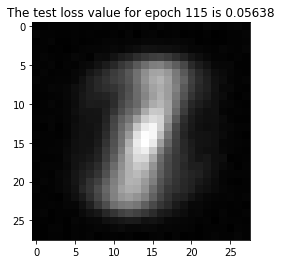

The train loss value for epoch 116 is 0.056531
The test loss value for epoch 116 is 0.056251


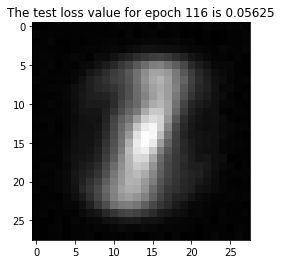

The train loss value for epoch 117 is 0.056409
The test loss value for epoch 117 is 0.056127


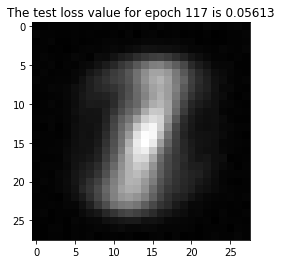

The train loss value for epoch 118 is 0.056287
The test loss value for epoch 118 is 0.056003


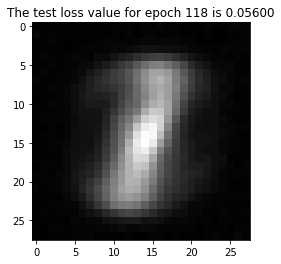

The train loss value for epoch 119 is 0.056166
The test loss value for epoch 119 is 0.055879


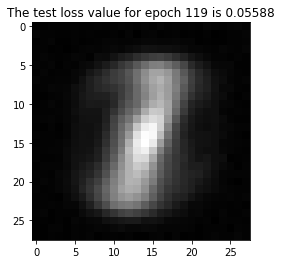

The train loss value for epoch 120 is 0.056046
The test loss value for epoch 120 is 0.055756


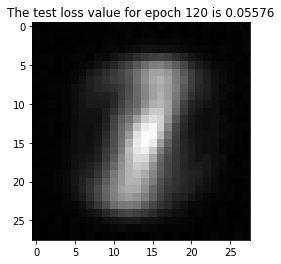

The train loss value for epoch 121 is 0.055926
The test loss value for epoch 121 is 0.055634


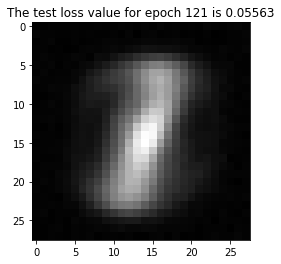

The train loss value for epoch 122 is 0.055806
The test loss value for epoch 122 is 0.055512


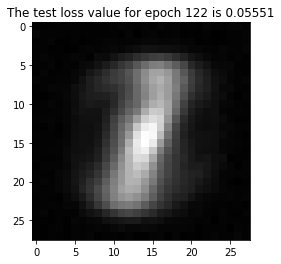

The train loss value for epoch 123 is 0.055687
The test loss value for epoch 123 is 0.055391


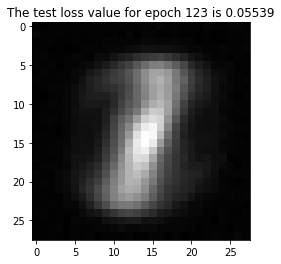

The train loss value for epoch 124 is 0.055568
The test loss value for epoch 124 is 0.055271


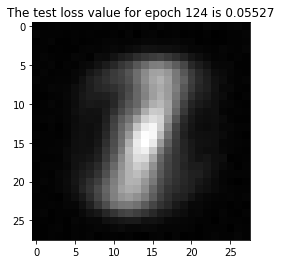

The train loss value for epoch 125 is 0.055450
The test loss value for epoch 125 is 0.055151


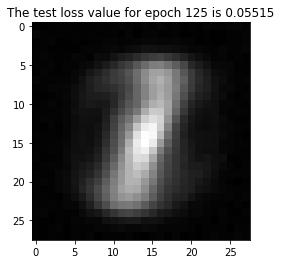

The train loss value for epoch 126 is 0.055332
The test loss value for epoch 126 is 0.055031


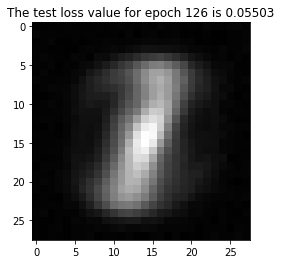

The train loss value for epoch 127 is 0.055215
The test loss value for epoch 127 is 0.054912


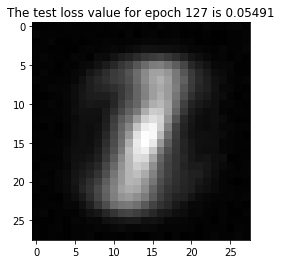

The train loss value for epoch 128 is 0.055098
The test loss value for epoch 128 is 0.054793


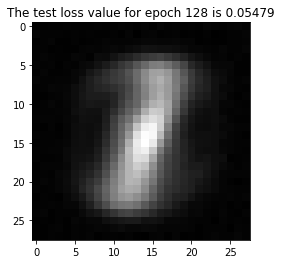

The train loss value for epoch 129 is 0.054982
The test loss value for epoch 129 is 0.054675


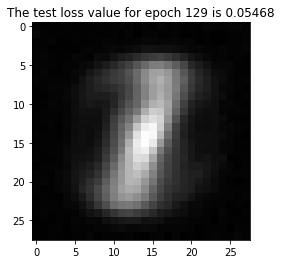

The train loss value for epoch 130 is 0.054866
The test loss value for epoch 130 is 0.054557


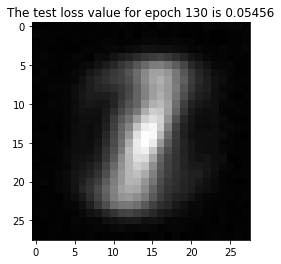

The train loss value for epoch 131 is 0.054751
The test loss value for epoch 131 is 0.054440


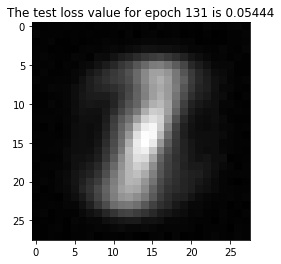

The train loss value for epoch 132 is 0.054636
The test loss value for epoch 132 is 0.054324


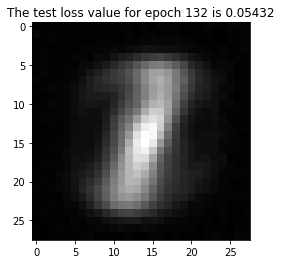

The train loss value for epoch 133 is 0.054521
The test loss value for epoch 133 is 0.054208


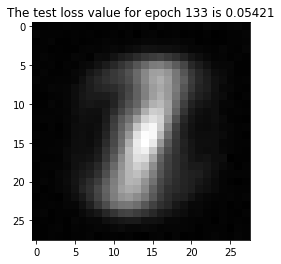

The train loss value for epoch 134 is 0.054407
The test loss value for epoch 134 is 0.054092


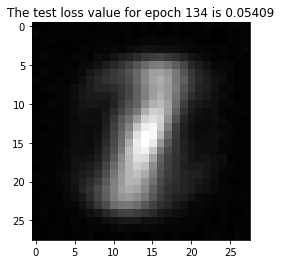

The train loss value for epoch 135 is 0.054294
The test loss value for epoch 135 is 0.053977


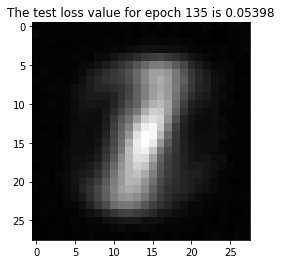

The train loss value for epoch 136 is 0.054181
The test loss value for epoch 136 is 0.053862


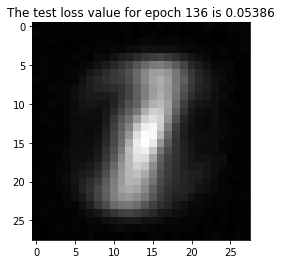

The train loss value for epoch 137 is 0.054068
The test loss value for epoch 137 is 0.053748


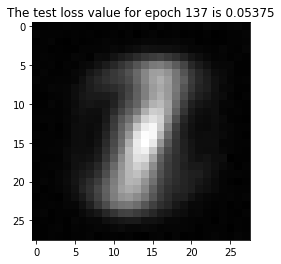

The train loss value for epoch 138 is 0.053956
The test loss value for epoch 138 is 0.053635


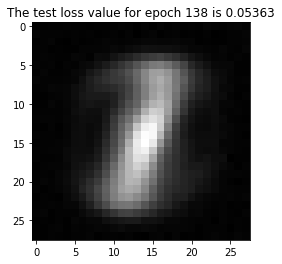

The train loss value for epoch 139 is 0.053844
The test loss value for epoch 139 is 0.053522


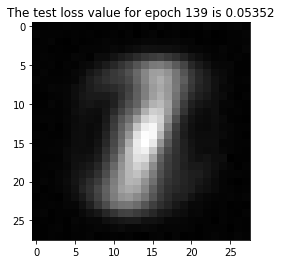

The train loss value for epoch 140 is 0.053733
The test loss value for epoch 140 is 0.053409


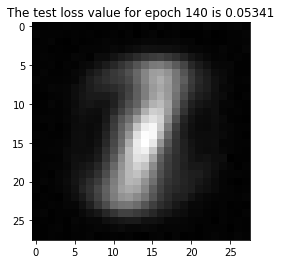

The train loss value for epoch 141 is 0.053623
The test loss value for epoch 141 is 0.053298


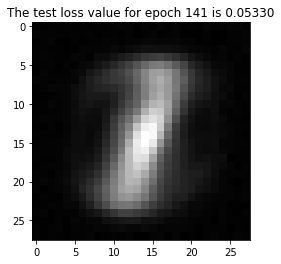

The train loss value for epoch 142 is 0.053513
The test loss value for epoch 142 is 0.053186


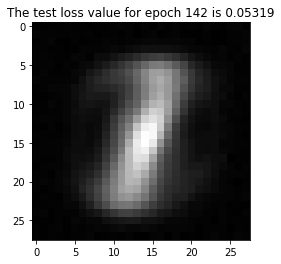

The train loss value for epoch 143 is 0.053403
The test loss value for epoch 143 is 0.053076


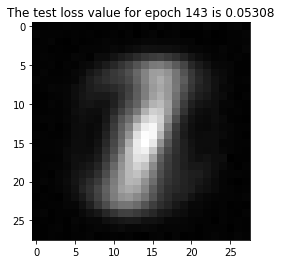

The train loss value for epoch 144 is 0.053294
The test loss value for epoch 144 is 0.052965


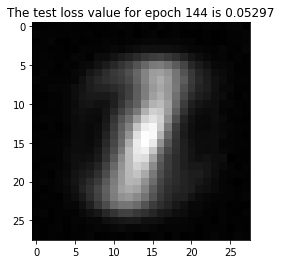

The train loss value for epoch 145 is 0.053186
The test loss value for epoch 145 is 0.052856


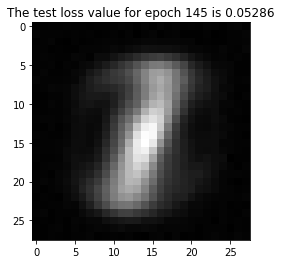

The train loss value for epoch 146 is 0.053078
The test loss value for epoch 146 is 0.052747


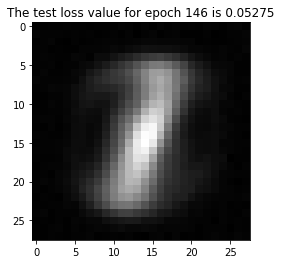

The train loss value for epoch 147 is 0.052971
The test loss value for epoch 147 is 0.052638


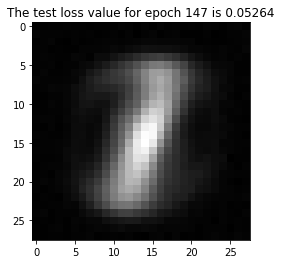

The train loss value for epoch 148 is 0.052864
The test loss value for epoch 148 is 0.052530


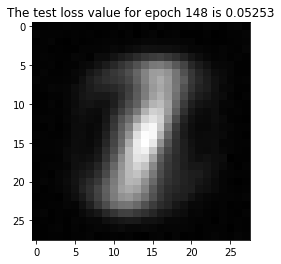

The train loss value for epoch 149 is 0.052758
The test loss value for epoch 149 is 0.052423


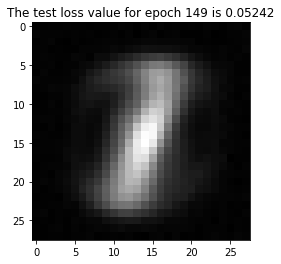

In [0]:
model = Model(x_train.shape[1], num_hidden=64)
learning_rate = .4
beta = 0.000001
batch_size = 128
fig = plt.figure()
train_loss_hist = []
test_loss_hist = []
for epoch in range(150):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_noisy[start_idx:end_idx, :]#now taking batches from noised x
    model.step(x_train_, x_train_, learning_rate, beta)#used a small beta for regularization

  train_loss = loss(x_train, model(x_noisy))
  test_loss = loss(x_test, model(x_test))
  train_loss_hist.append(train_loss)
  test_loss_hist.append(test_loss)
  print(f'The train loss value for epoch {epoch} is {train_loss:0.6f}')
  print(f'The test loss value for epoch {epoch} is {test_loss:0.6f}')
  x_test_hat = model(x_test)
  test_img = np.reshape(x_test_hat[2,:], (28, 28))
  plt.imshow(test_img, cmap=plt.cm.gray)
  plt.title(f'The test loss value for epoch {epoch} is {test_loss:0.5f}')
  plt.show()


In [0]:
denoiseModel0_1 = model

## Question 3 Part 2
Choose one of the denoising autencoders from the previous step. Use the hidden representation to train a model to predict the number present in the image.

In [0]:
x_presentation_train = denoiseModel0_1.encode(x_train)
x_presentation_test = denoiseModel0_1.encode(x_test)

In [0]:
import math
import random
a = .5 #learning rate. I ended up using a relatively high value for learning rate
#because 3 epochs of ~900 batches is still far from causing bounces in loss at a = 0.1 to 0.5. 
#I could justifiably crank learning rate up even more.
#I believe a dynamic learning rate is called for in this shallow network.
b_size = 64 #batch size
epoch_num = 3
initialize_seed = 5
test_frequency = 25

test_loss_history_epoch = []
train_loss_history_epoch = []


record_frequency = 10
test_loss_history = []
train_loss_history= []

test_accu_history = []
train_accu_history = []
'''class MyModel(tf.keras.Model):
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(32, activation = tf.nn.sigmoid)
    self.dense2 = tf.keras.layers.Dense(10, activation = tf.nn.softmax)
  
  def call(self, input):
    x = self.dense1(input)
    return self.dense2(x)

def loss(predicted_y, desired_y):https://en.wikipedia.org/wiki/Mean_squared_error
  return tf.losses.mean_squared_error(predicted_y - desired_y)


def train(model, inputs, outputs, learning_rate):
  print(inputs.shape)
  print(outputs.shape)
  print(model(x_train).shape)
  with tf.GradientTape() as t:
    current_loss = loss(y_train,model(x_train))
  loss_history.append(current_loss.numpy())
  grads = tape.gradient(current_loss, MyModel.trainable_variables)
  print(grads)
 
model = MyModel()
train(model, x_train, y_train, learning_rate)'''


  
y_train_oh = tf.one_hot(y_train,10)
y_test_oh = tf.one_hot(y_test,10)

class MyModel():
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.w1 = tf.get_variable("w1", (64,32),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.w2 = tf.get_variable("w2", (32,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b1 = tf.get_variable("b1", (1,32),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b2 = tf.get_variable("b2", (1,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.dw = [] 
    self.db = []
  
  def __call__(self, input):
    A1 = tf.matmul(input, self.w1) + tf.broadcast_to(self.b1, tf.matmul(input, self.w1).shape)
    A1 = tf.sigmoid(A1)
    A2 = tf.matmul(A1,self.w2) + tf.broadcast_to(self.b2, tf.matmul(A1,self.w2).shape)
    A2 = tf.nn.softmax(A2)
    return A2
  
  def update(self, dw, db, learning_rate = 0.1):
    self.w1 = tf.math.subtract(self.w1, tf.math.multiply(dw[0],learning_rate))
    self.w2 = tf.math.subtract(self.w2, tf.math.multiply(dw[1],learning_rate))
    self.b1 = tf.math.subtract(self.b1, tf.math.multiply(db[0],learning_rate))
    self.b2 = tf.math.subtract(self.b2, tf.math.multiply(db[1],learning_rate))
    
  
def train_batch(model, inputs, outputs, learning_rate):
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(model.w2)
    tape.watch(model.w1)
    tape.watch(model.b1)
    tape.watch(model.b2)
    current_loss = loss(outputs,model(inputs))
  [w1_grad] = tape.gradient(current_loss, [model.w1])
  [w2_grad] = tape.gradient(current_loss, [model.w2])
  [b1_grad] = tape.gradient(current_loss, [model.b1])
  [b2_grad] = tape.gradient(current_loss, [model.b2])
  model.update([w1_grad,w2_grad],[b1_grad,b2_grad],a)
  del tape

def train(model, input, labels, learning_rate, num_epoch = 1, batch_size = 64, small_data = False):
  batch_counter = 0
  for cur_epoch in range(0, num_epoch):
    seed = math.floor(100*random.random())
    input_batches, label_batches, batch_num = batchize(input, labels, batch_size, seed)
    print("Number of batches : {}".format(len(input_batches)))
    if small_data:
      batch_num = math.ceil(batch_num/5)
    for cur_batch in range(0, batch_num):
      batch_counter += 1
      if cur_batch % test_frequency == 0:
        train_acc, train_loss = test(model, input, labels)
        test_acc, test_loss = test(model, x_presentation_test, y_test_oh)
        test_loss_history.append(test_loss)
        train_loss_history.append(train_loss)
        test_accu_history.append(test_acc)
        train_accu_history.append(train_acc)
        print("train accu {} loss {}, test accu {} loss {}".format(train_acc, train_loss, test_acc, test_loss))
        
      print("Training {} batch of {} epoch".format(cur_batch + 1,cur_epoch + 1))
      input_batch = input_batches[cur_batch]
      label_batch = label_batches[cur_batch]
      train_batch(model,input_batch,label_batch,learning_rate)
    train_acc, train_loss = test(model, input, labels)
    test_acc, test_loss = test(model, x_presentation_test , y_test_oh)
    test_loss_history.append(test_loss)
    train_loss_history.append(train_loss)
    test_accu_history.append(test_acc)
    train_accu_history.append(train_acc)
    
    test_c, test_total, test_loss = test(model, x_presentation_test , y_test_oh,False)
    print("Final Model Test Accuracy {}/{} Test Loss {}".format(test_c, test_total, test_loss))
    print("Epoch {} Testing loss{}".format(cur_epoch, test_loss))
  print("Total Batch Trained {} with size{}".format(batch_counter, batch_size))
  

def batchize(input, labels, batch_size = 64, seed = 10):
  tf.random.shuffle(input,seed)
  tf.random.shuffle(labels,seed)
  sample_num = input.shape[0]
  assert(input.shape[0] == labels.shape[0])
  input_batches = []
  label_batches = []
  i = 0
  while (i + 1) * batch_size < sample_num:
    input_batches.append(input[i:i+batch_size])
    label_batches.append(labels[i:i+batch_size])
    i = i + 1
  input_batches.append(input[i:])
  label_batches.append(labels[i:])
  return[input_batches, label_batches, i]
    

  
    
  
def loss(desired_y,predicted_y):
  return tf.losses.mean_squared_error(desired_y, predicted_y)

def test(model, inputs = x_presentation_test, labels = y_test_oh, percentage = True):
  total = 0
  correct = 0
  prediction = model(inputs)
  num_tests = inputs.shape[0]
  for i in range(0, num_tests):
    pred = tf.math.argmax(input = prediction[i]).numpy()
    label = tf.math.argmax(input = labels[i]).numpy()
    if(label == pred):
      correct += 1
      total += 1
    else:
      total += 1
  accuracy = 1.0*correct/total
  print("Total {}, correct {}".format(total, correct))
  if percentage is True:
    return [correct/total, loss(prediction, labels)]
  return [correct, total, loss(prediction, labels)]
      
print(x_presentation_train.shape)
  
predictiveModel = MyModel()
train(predictiveModel, x_presentation_train, y_train_oh, a,epoch_num, b_size)

(60000, 64)
Number of batches : 938
Total 60000, correct 5296
Total 10000, correct 856
train accu 0.08826666666666666 loss 0.16096395254135132, test accu 0.0856 loss 0.16165919601917267
Training 1 batch of 1 epoch
Training 2 batch of 1 epoch
Training 3 batch of 1 epoch
Training 4 batch of 1 epoch
Training 5 batch of 1 epoch
Training 6 batch of 1 epoch
Training 7 batch of 1 epoch
Training 8 batch of 1 epoch
Training 9 batch of 1 epoch
Training 10 batch of 1 epoch
Training 11 batch of 1 epoch
Training 12 batch of 1 epoch
Training 13 batch of 1 epoch
Training 14 batch of 1 epoch
Training 15 batch of 1 epoch
Training 16 batch of 1 epoch
Training 17 batch of 1 epoch
Training 18 batch of 1 epoch
Training 19 batch of 1 epoch
Training 20 batch of 1 epoch
Training 21 batch of 1 epoch
Training 22 batch of 1 epoch
Training 23 batch of 1 epoch
Training 24 batch of 1 epoch
Training 25 batch of 1 epoch
Total 60000, correct 5334
Total 10000, correct 851
train accu 0.0889 loss 0.11815406382083893, tes

Plot the training and testing accuracy for each epoch during training.

<function matplotlib.pyplot.show>

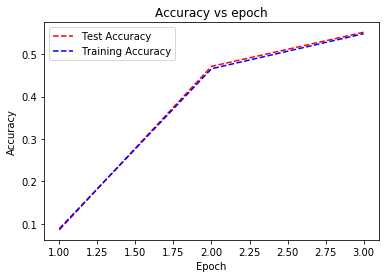

In [0]:

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Accuracy vs epoch')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

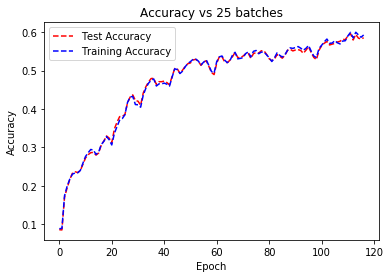

In [0]:

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(len(test_accu_history))
plt.plot(x_axis, test_accu_history, 'r--')

plt.plot(x_axis, train_accu_history, 'b--')
plt.title('Accuracy vs 25 batches')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show